In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D   


In [2]:
merger = pd.read_csv('assignment02/IDs_and_CEs_flags.csv', header = 0, dtype = {'fMT': object, 'Z': object, 'chunk':object})
merger

,ID,fMT,Z,chunk,1A_CE,1B_CE,1C_CE,2A_CE,2B_CE
0,93,01,0.0002,0,True,True,False,False,True
1,156,01,0.0002,0,False,False,False,True,True
2,167,01,0.0002,0,False,False,False,True,True
3,221,01,0.0002,0,False,False,False,True,True
4,257,01,0.0002,0,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
5093313,1999296,1,0.02,4,False,False,False,True,True
5093314,1999439,1,0.02,4,False,False,False,True,True
5093315,1999780,1,0.02,4,False,False,False,True,True
5093316,1999801,1,0.02,4,False,False,False,True,True


In [3]:
fMT           = merger.loc[:,'fMT'].unique()
metallicities = merger.loc[:,'Z'].unique()
chunks        = merger.loc[:,'chunk'].unique()

columns_names = ['CE_phase',  'NOT_CE_phase', 'ONE_CE', 'TWO_CE', 'THREE_CE', 'FOUR_CE', '1A_CE', '1B_CE', '1C_CE' , '2A_CE', '2B_CE', "tot_events", 'Z', 'fMT']
results = pd.DataFrame(columns = columns_names)    

fmt_to_csv = ['0.1','0.2','0.3','0.4','0.5','0.7','1']

for sim_num, fMT_to_csv in zip(fMT, fmt_to_csv):
    for Z in metallicities:
        subindices = merger[(merger.loc[:,'Z'] == Z )&(merger.loc[:,'fMT'] == sim_num)]
        
        tot_events = len(subindices)
        
        #if not consider first CE
        #yes_CE = len(subindices[(subindices.loc[:,'1B_CE'])|(subindices.loc[:,'1C_CE'])|(subindices.loc[:,'2A_CE'])|(subindices.loc[:,'2B_CE'])])

        #if consider first CE
        yes_CE = len(subindices[(subindices.loc[:,'1A_CE'])|(subindices.loc[:,'1B_CE'])|(subindices.loc[:,'1C_CE'])|(subindices.loc[:,'2A_CE'])|(subindices.loc[:,'2B_CE'])])
        no_CE  = tot_events - yes_CE
        
        one_CE   = len(subindices[np.sum(subindices[['1A_CE', '1B_CE', '1C_CE', '2A_CE', '2B_CE']], axis = 1) == 1])
        two_CE   = len(subindices[np.sum(subindices[['1A_CE', '1B_CE', '1C_CE', '2A_CE', '2B_CE']], axis = 1) == 2])
        three_CE = len(subindices[np.sum(subindices[['1A_CE', '1B_CE', '1C_CE', '2A_CE', '2B_CE']], axis = 1) == 3])
        four_CE  = len(subindices[np.sum(subindices[['1A_CE', '1B_CE', '1C_CE', '2A_CE', '2B_CE']], axis = 1) == 4])
        
        ONE_A_CE  = len(subindices[subindices['1A_CE']])
        ONE_B_CE  = len(subindices[subindices['1B_CE']])
        ONE_C_CE  = len(subindices[subindices['1C_CE']])
        TWO_A_CE  = len(subindices[subindices['2A_CE']])
        TWO_B_CE  = len(subindices[subindices['2B_CE']])
        
        percents = {'CE_phase': yes_CE/tot_events, 'NOT_CE_phase' : no_CE/tot_events , 
                    'ONE_CE':one_CE/tot_events, 'TWO_CE': two_CE/tot_events , 
                    'THREE_CE' : three_CE/tot_events , 'FOUR_CE': four_CE/tot_events,
                    
                    '1A_CE': ONE_A_CE/tot_events, '1B_CE': ONE_B_CE/tot_events,
                    '1C_CE': ONE_C_CE/tot_events,
                    '2A_CE': TWO_A_CE/tot_events, '2B_CE': TWO_B_CE/tot_events,
                    
                    "tot_events": tot_events , 'Z' : Z, 'fMT' : fMT_to_csv  }
        
        results = results.append(percents, ignore_index = True)

results.to_csv('CE_fraction_definitive.csv',  index = False)

In [4]:
percent_CE = pd.read_csv('CE_fraction_definitive.csv', header = 0,  dtype = {'fMT': object, 'Z': object, 'chunk':object})

In [5]:
percent_CE

,CE_phase,NOT_CE_phase,ONE_CE,TWO_CE,THREE_CE,FOUR_CE,1A_CE,1B_CE,1C_CE,2A_CE,2B_CE,tot_events,Z,fMT
0,0.999992,0.000008,0.030317,0.768068,0.201607,0.0,0.211656,0.066648,0.008875,0.926270,0.957825,122704,0.0002,0.1
1,1.000000,0.000000,0.052740,0.733466,0.213794,0.0,0.240317,0.133008,0.010308,0.844225,0.933196,71597,0.0004,0.1
2,1.000000,0.000000,0.064211,0.703451,0.232338,0.0,0.266762,0.167635,0.009306,0.800557,0.923867,58884,0.0008,0.1
3,1.000000,0.000000,0.067255,0.693931,0.238814,0.0,0.272785,0.167688,0.008396,0.800965,0.921727,56814,0.0012,0.1
4,0.999982,0.000018,0.066576,0.720807,0.212600,0.0,0.247499,0.160030,0.008765,0.806151,0.923544,56477,0.0016,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.000000,0.000000,0.066278,0.754702,0.179021,0.0,0.234215,0.111542,0.013388,0.835201,0.918397,40783,0.006,1
80,1.000000,0.000000,0.025579,0.851450,0.122971,0.0,0.172765,0.083200,0.010813,0.867758,0.962858,50589,0.008,1
81,1.000000,0.000000,0.007307,0.922264,0.070429,0.0,0.121628,0.055951,0.009353,0.893138,0.983052,59123,0.012,1
82,1.000000,0.000000,0.003241,0.950648,0.046111,0.0,0.101170,0.039962,0.008078,0.905280,0.988381,63260,0.016,1


# CE - Systems that either undergo or do not CE phase

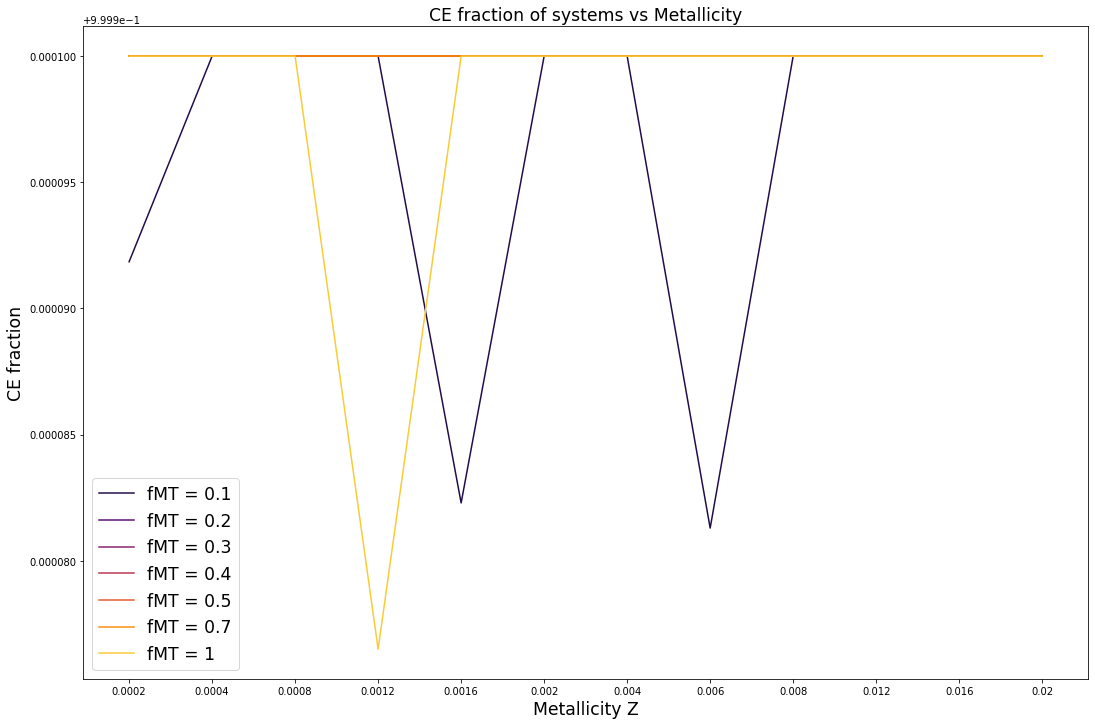

In [6]:
fmt_to_csv = ['0.1','0.2','0.3','0.4','0.5','0.7','1']

sns.set_palette('inferno', 7)

fig = plt.subplots(figsize = (18,12))
for fMT in fmt_to_csv :
        data = percent_CE[percent_CE.loc[:,'fMT'] == fMT]
        sns.lineplot( data['Z'], data['CE_phase'], label = "fMT = "+str(fMT), err_style = 'bars', err_kws = {} )


plt.xlabel('Metallicity Z', fontsize = 'xx-large')
plt.ylabel('CE fraction', fontsize = 'xx-large')
plt.title('CE fraction of systems vs Metallicity', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.savefig('CEpercent_vs_metallicity.png')
plt.show()

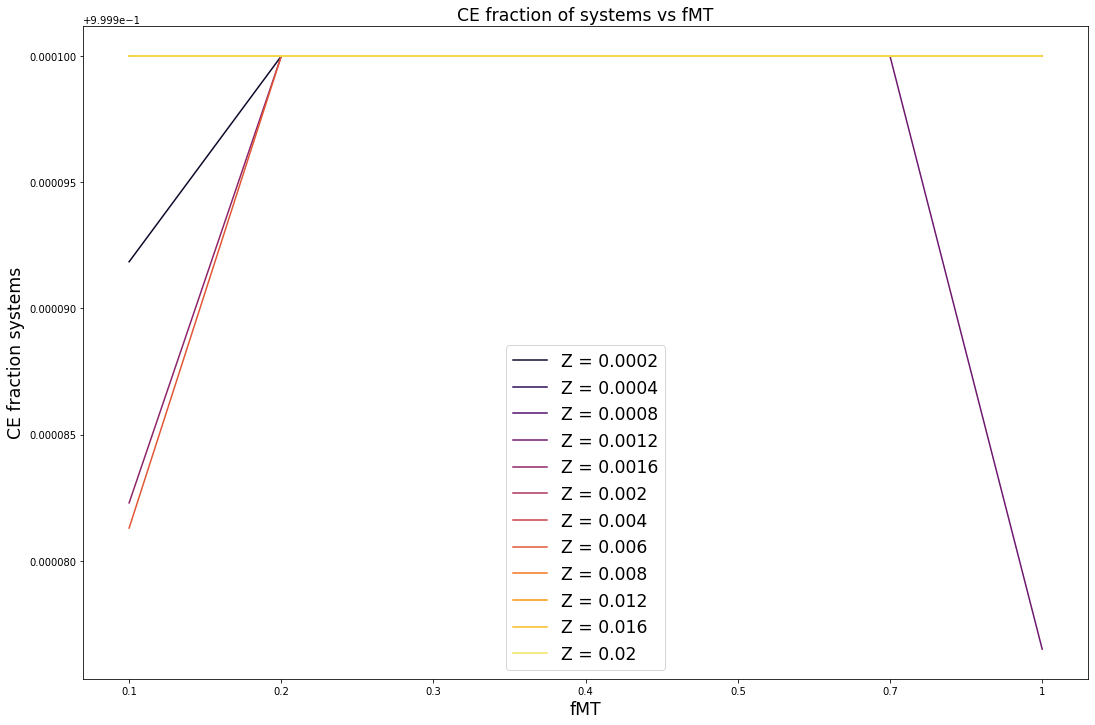

In [7]:
sns.set_palette('inferno', 12)

fig = plt.subplots(figsize = (18,12))
for Z in metallicities :
        data = percent_CE[percent_CE['Z'] == Z]
        sns.lineplot( data['fMT'], data['CE_phase'], label = "Z = "+str(Z))


plt.xlabel('fMT', fontsize = 'xx-large')
plt.ylabel('CE fraction systems', fontsize = 'xx-large')
plt.title('CE fraction of systems vs fMT', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.savefig('CEpercent_vs_fMT.png')
plt.show()

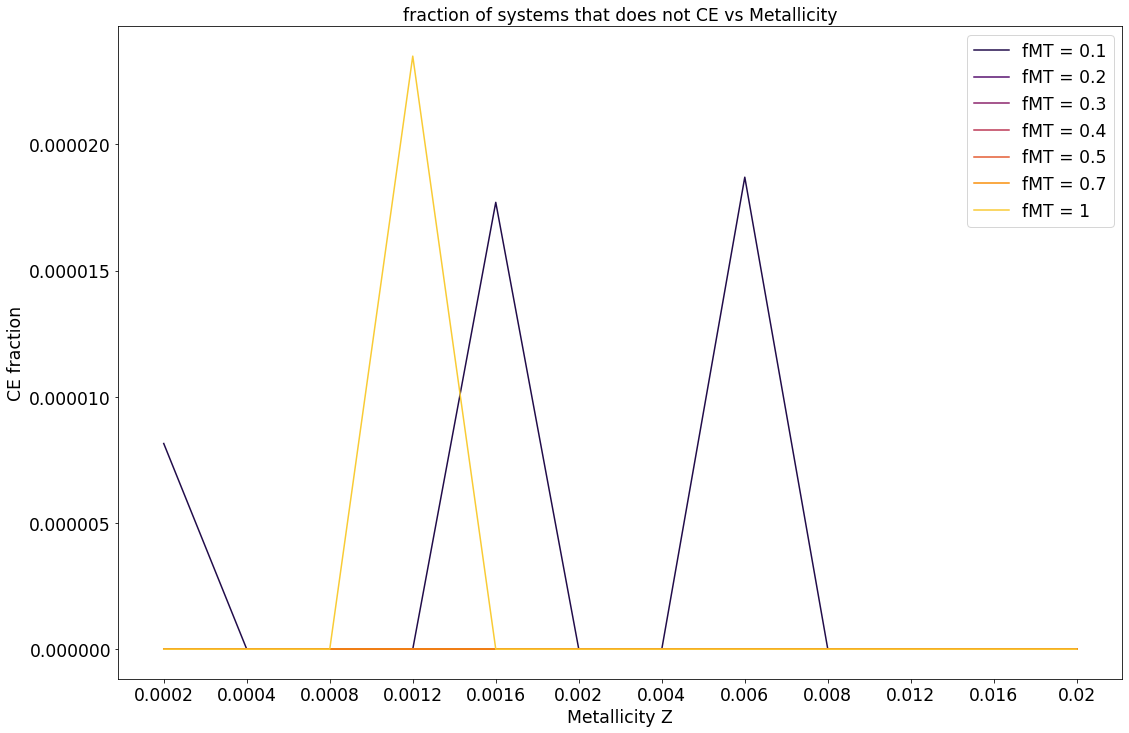

In [8]:
sns.set_palette('inferno', 7)

fig = plt.subplots(figsize = (18,12))
for fMT in fmt_to_csv :
        data = percent_CE[percent_CE['fMT'] == fMT]
        sns.lineplot( data['Z'], data['NOT_CE_phase'], label = "fMT = "+str(fMT), err_style = 'bars', err_kws = {} )


plt.xlabel('Metallicity Z', fontsize = 'xx-large')
plt.ylabel('CE fraction', fontsize = 'xx-large')
plt.tick_params( labelsize = 'xx-large' )
plt.title('fraction of systems that does not CE vs Metallicity', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.savefig('NOT_CEpercent_vs_metallicity.png')
plt.show()

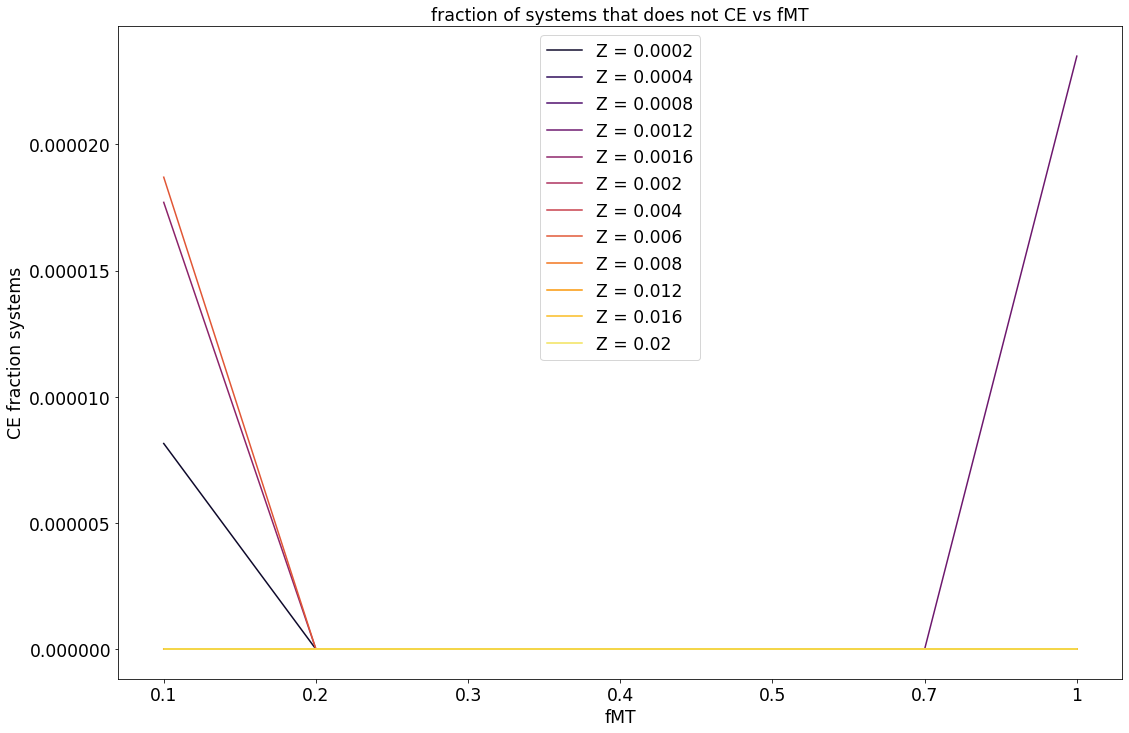

In [9]:
sns.set_palette('inferno', 12)

fig = plt.subplots(figsize = (18,12))
for Z in metallicities :
        data = percent_CE[percent_CE['Z'] == Z]
        sns.lineplot( data['fMT'], data['NOT_CE_phase'], label = "Z = "+str(Z))


plt.xlabel('fMT', fontsize = 'xx-large')
plt.ylabel('CE fraction systems', fontsize = 'xx-large')
plt.title('fraction of systems that does not CE vs fMT', fontsize = 'xx-large')
plt.tick_params( labelsize = 'xx-large' )
plt.legend(fontsize = 'xx-large')
plt.savefig('NOT_CEpercent_vs_fMT.png')
plt.show()

# Fraction of systems and number of CE analysis

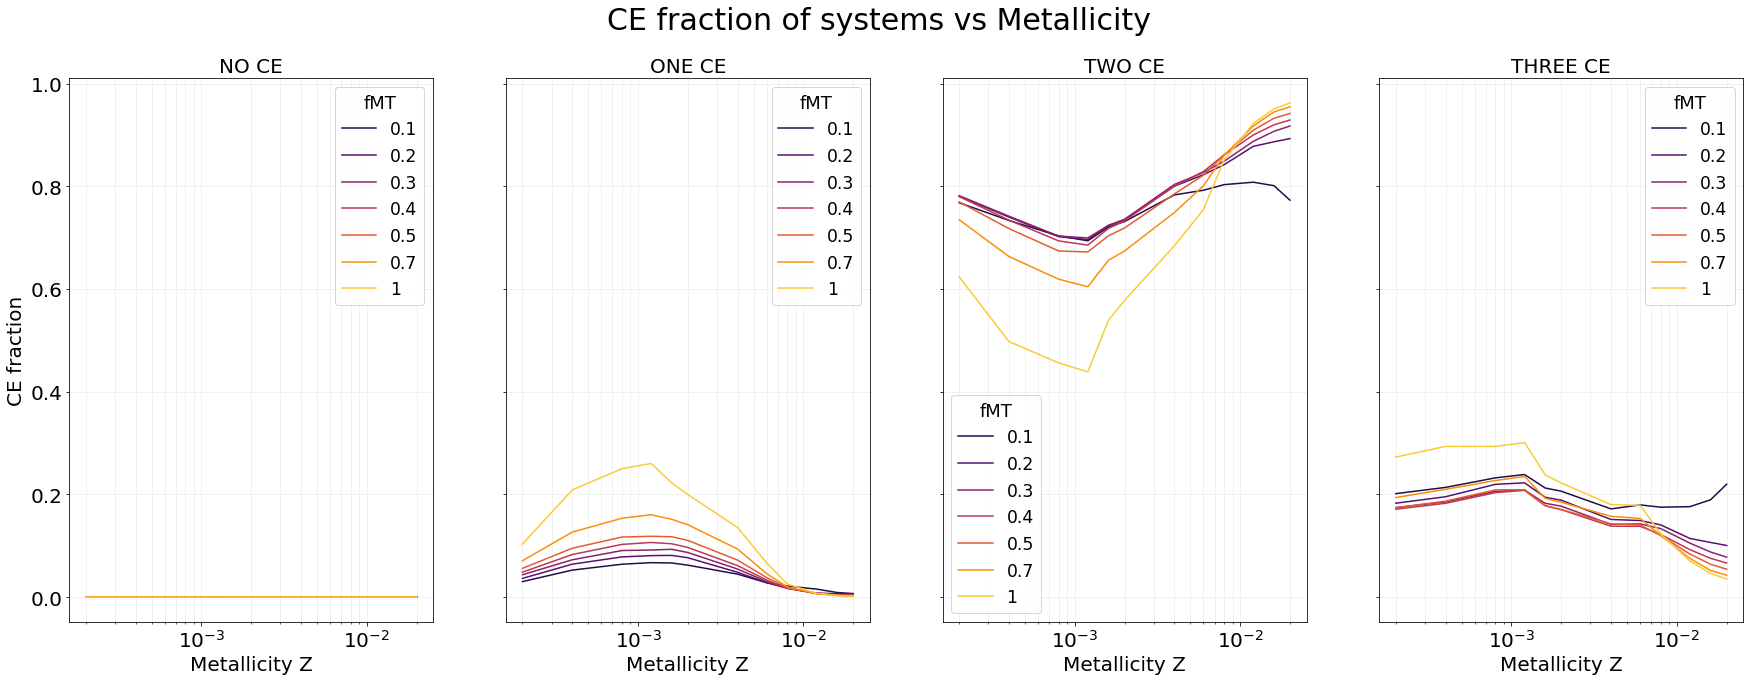

In [10]:
sns.set_palette('inferno', 7)

fig, ax = plt.subplots(1,4, figsize = (30,10), sharey = True)
for fMT in fmt_to_csv :
        data = percent_CE[percent_CE['fMT'] == fMT]
        sns.lineplot( data['Z'].astype(float), data['NOT_CE_phase'], label = str(fMT), ax = ax[0] )
        sns.lineplot( data['Z'].astype(float), data['ONE_CE'], label = str(fMT), ax = ax[1] )
        sns.lineplot( data['Z'].astype(float), data['TWO_CE'], label = str(fMT), ax = ax[2] )
        sns.lineplot( data['Z'].astype(float), data['THREE_CE'], label = str(fMT), ax = ax[3] )

plt.suptitle('CE fraction of systems vs Metallicity', fontsize = 30)

ax[0].set_title('NO CE', fontsize = 20)
ax[0].set_xlabel('Metallicity Z', fontsize = 20)
ax[0].legend(fontsize = 'xx-large', title = 'fMT', title_fontsize = 18)
ax[0].set_ylabel('CE fraction', fontsize = 20)
ax[0].set_xscale('log')
ax[0].tick_params( labelsize = 20 )
ax[0].grid(True, which="both", ls="-",color='0.93')    


ax[1].set_title('ONE CE', fontsize = 20)
ax[1].set_xlabel('Metallicity Z', fontsize = 20)
ax[1].legend(fontsize = 'xx-large', title = 'fMT', title_fontsize = 18)
ax[1].set_ylabel('CE fraction', fontsize = 20)
ax[1].set_xscale('log')
ax[1].tick_params( labelsize = 20 )
ax[1].grid(True, which="both", ls="-",color='0.93')    


ax[2].set_xlabel('Metallicity Z', fontsize = 20)
ax[2].set_ylabel('CE fraction', fontsize = 20)
ax[2].legend(fontsize = 'xx-large', title = 'fMT', title_fontsize = 18)
ax[2].set_title('TWO CE',fontsize = 20)
ax[2].set_xscale('log')
ax[2].tick_params( labelsize = 20 )
ax[2].grid(True, which="both", ls="-",color='0.93')    


ax[3].set_title('THREE CE', fontsize = 20)
ax[3].set_xlabel('Metallicity Z', fontsize = 20)
ax[3].legend(fontsize = 'xx-large', title = 'fMT', title_fontsize = 18)
ax[3].set_ylabel('CE fraction', fontsize = 20)
ax[3].set_xscale('log')
ax[3].tick_params( labelsize = 20 )
ax[3].grid(True, which="both", ls="-",color='0.93')    



plt.savefig('count_CE_vs_metallicity.png')
plt.show()

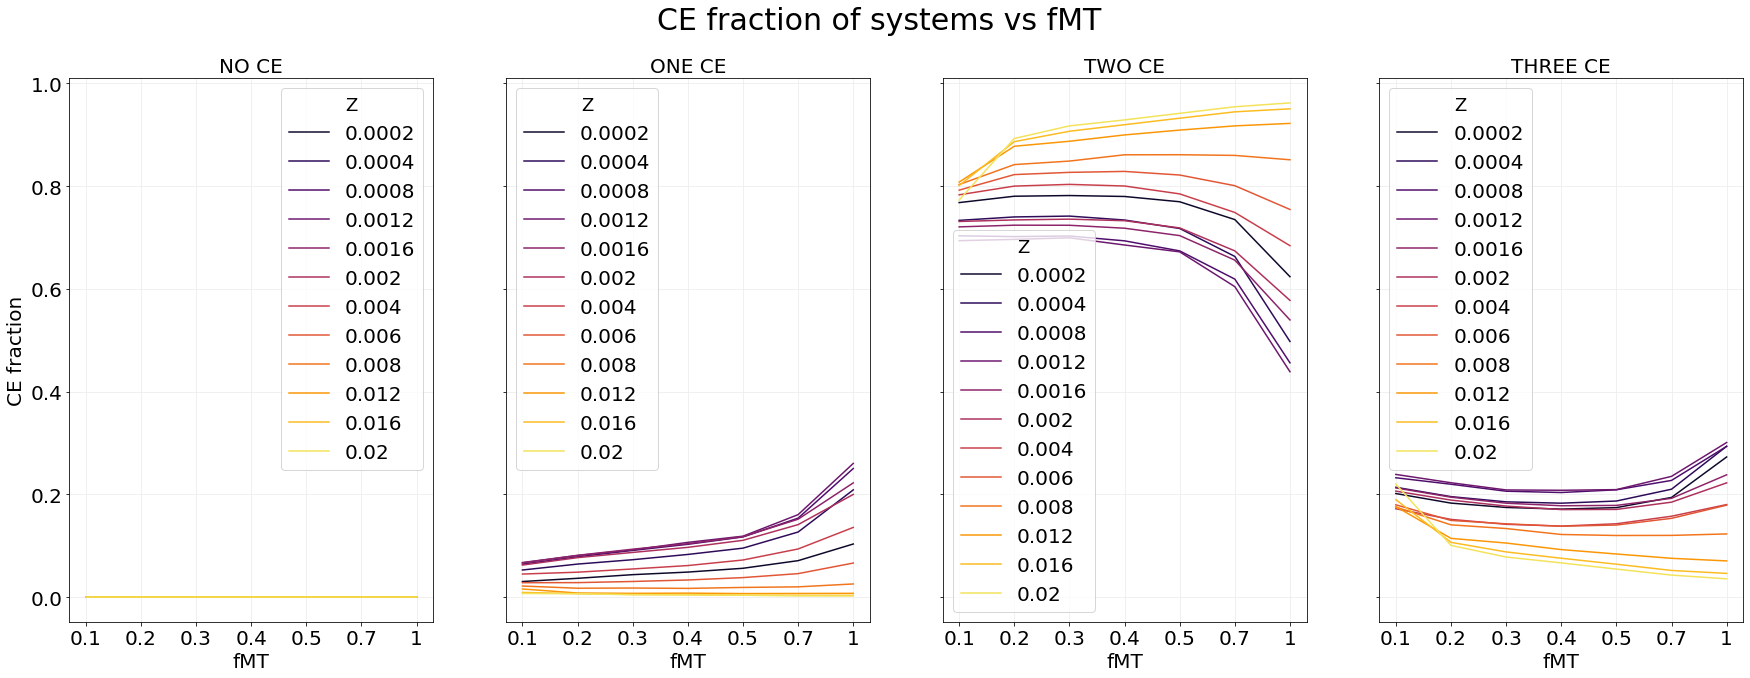

In [11]:
sns.set_palette('inferno', 12)

fig, ax = plt.subplots(1,4, figsize = (30,10), sharey = True)

for Z in metallicities :
        data = percent_CE[percent_CE['Z'] == Z]
        sns.lineplot( data['fMT'], data['NOT_CE_phase'], label = str(Z), ax = ax[0])
        sns.lineplot( data['fMT'], data['ONE_CE'], label = str(Z), ax = ax[1])
        sns.lineplot( data['fMT'], data['TWO_CE'], label = str(Z), ax = ax[2])
        sns.lineplot( data['fMT'], data['THREE_CE'], label = str(Z), ax = ax[3])

plt.suptitle('CE fraction of systems vs fMT', fontsize = 30)

ax[0].set_title('NO CE', fontsize = 20)
ax[0].set_xlabel('fMT', fontsize = 20)
ax[0].legend(fontsize = 20, title = 'Z', title_fontsize = 18)
ax[0].set_ylabel('CE fraction', fontsize = 20)
ax[0].tick_params( labelsize = 20 )
ax[0].grid(True, which="both", ls="-",color='0.93')    


ax[1].set_title('ONE CE', fontsize = 20)
ax[1].set_xlabel('fMT', fontsize = 20)
ax[1].set_ylabel('CE fraction systems', fontsize = 20)
ax[1].legend(fontsize = 20, title = 'Z', title_fontsize = 18)
ax[1].tick_params( labelsize = 20 )
ax[1].grid(True, which="both", ls="-",color='0.93')    


ax[2].set_title('TWO CE', fontsize = 20)
ax[2].set_xlabel('fMT', fontsize = 20)
ax[2].set_ylabel('CE fraction systems', fontsize = 20)
ax[2].legend(fontsize = 20, title = 'Z', title_fontsize = 18)
ax[2].tick_params( labelsize = 20 )
ax[2].grid(True, which="both", ls="-",color='0.93')    


ax[3].set_title('THREE CE', fontsize = 20)
ax[3].set_xlabel('fMT', fontsize = 20)
ax[3].legend(fontsize = 20, title = 'Z', title_fontsize = 18)
ax[3].set_ylabel('CE fraction', fontsize = 20)
ax[3].tick_params( labelsize = 20 )
ax[3].grid(True, which="both", ls="-",color='0.93')    



plt.savefig('count_CE_vs_fMT.png')
plt.show()

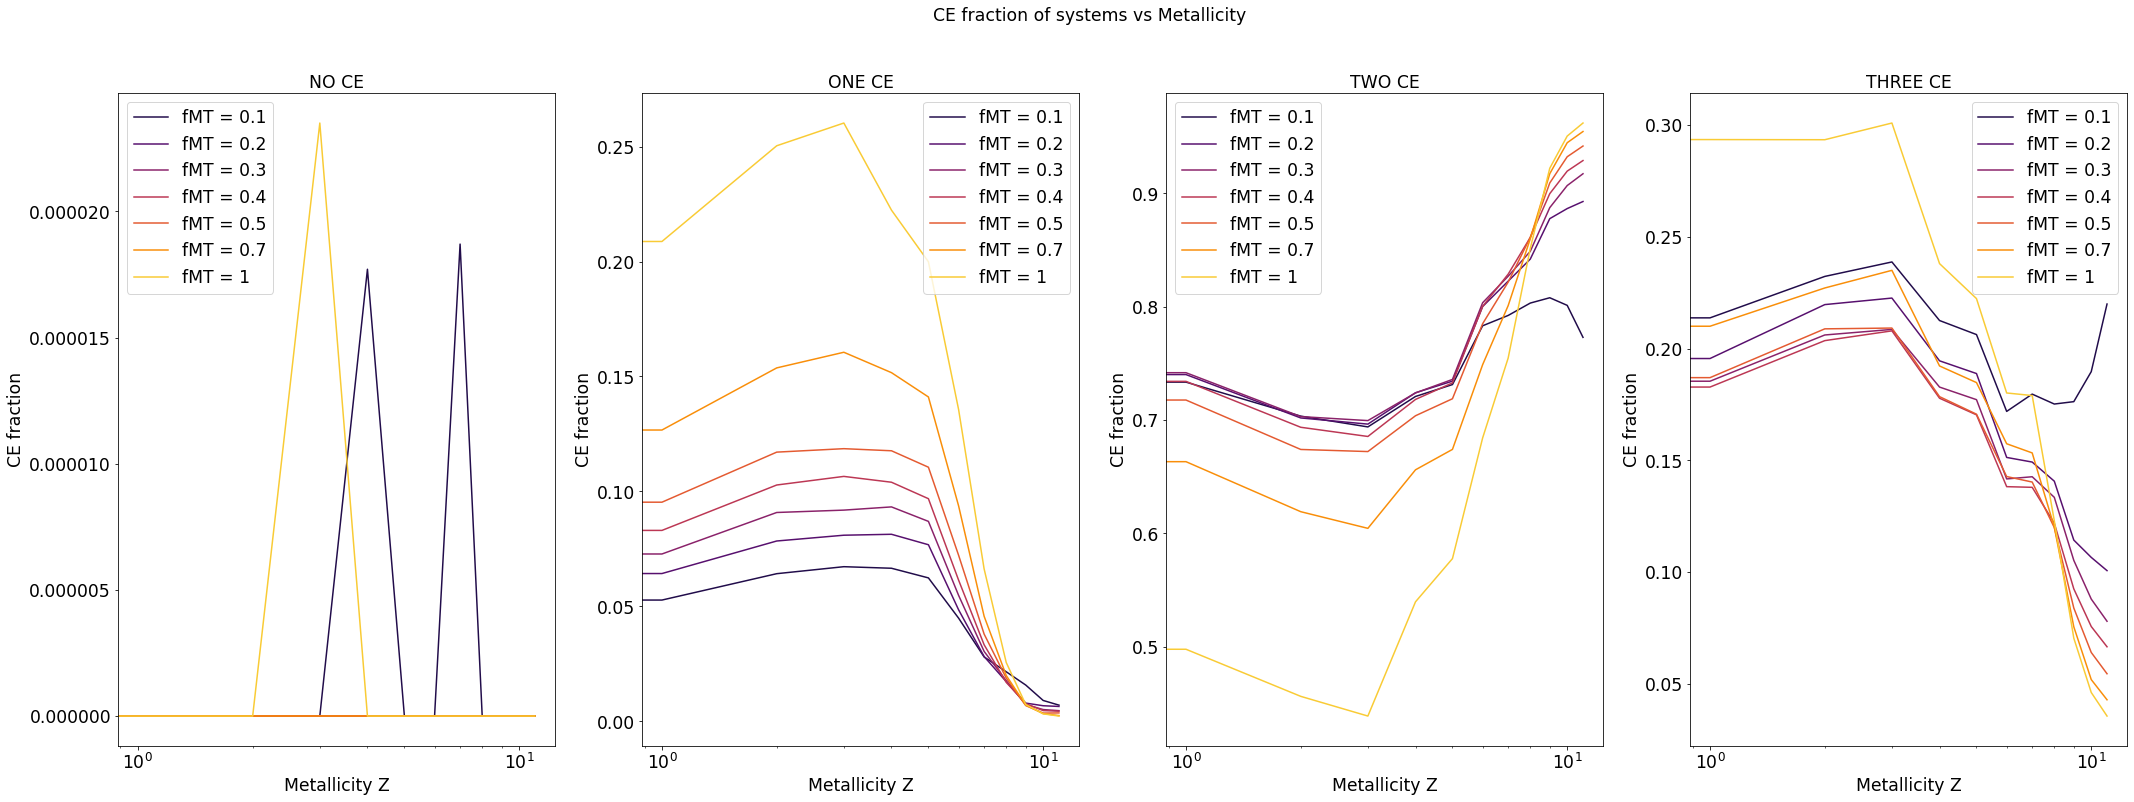

In [12]:
sns.set_palette('inferno', 7)

fig, ax = plt.subplots(1,4, figsize = (36,12))
for fMT in fmt_to_csv :
        data = percent_CE[percent_CE['fMT'] == fMT]
        sns.lineplot( data['Z'], data['NOT_CE_phase'], label = "fMT = "+str(fMT), ax = ax[0] )
        sns.lineplot( data['Z'], data['ONE_CE'], label = "fMT = "+str(fMT), ax = ax[1] )
        sns.lineplot( data['Z'], data['TWO_CE'], label = "fMT = "+str(fMT), ax = ax[2] )
        sns.lineplot( data['Z'], data['THREE_CE'], label = "fMT = "+str(fMT), ax = ax[3] )

plt.suptitle('CE fraction of systems vs Metallicity', fontsize = 'xx-large')

ax[0].set_title('NO CE', fontsize = 'xx-large')
ax[0].set_xlabel('Metallicity Z', fontsize = 'xx-large')
ax[0].legend(fontsize = 'xx-large')
ax[0].set_ylabel('CE fraction', fontsize = 'xx-large')
ax[0].tick_params( labelsize = 'xx-large' )
ax[0].set_xscale( 'log' )

ax[1].set_title('ONE CE', fontsize = 'xx-large')
ax[1].set_xlabel('Metallicity Z', fontsize = 'xx-large')
ax[1].legend(fontsize = 'xx-large')
ax[1].set_ylabel('CE fraction', fontsize = 'xx-large')
ax[1].tick_params( labelsize = 'xx-large' )
ax[1].set_xscale( 'log' )

ax[2].set_xlabel('Metallicity Z', fontsize = 'xx-large')
ax[2].set_ylabel('CE fraction', fontsize = 'xx-large')
ax[2].legend(fontsize = 'xx-large')
ax[2].set_title('TWO CE',fontsize = 'xx-large')
ax[2].tick_params( labelsize = 'xx-large' )
ax[2].set_xscale( 'log' )

ax[3].set_title('THREE CE', fontsize = 'xx-large')
ax[3].set_xlabel('Metallicity Z', fontsize = 'xx-large')
ax[3].legend(fontsize = 'xx-large')
ax[3].set_ylabel('CE fraction', fontsize = 'xx-large')
ax[3].tick_params( labelsize = 'xx-large' )
ax[3].set_xscale( 'log' )

plt.show()

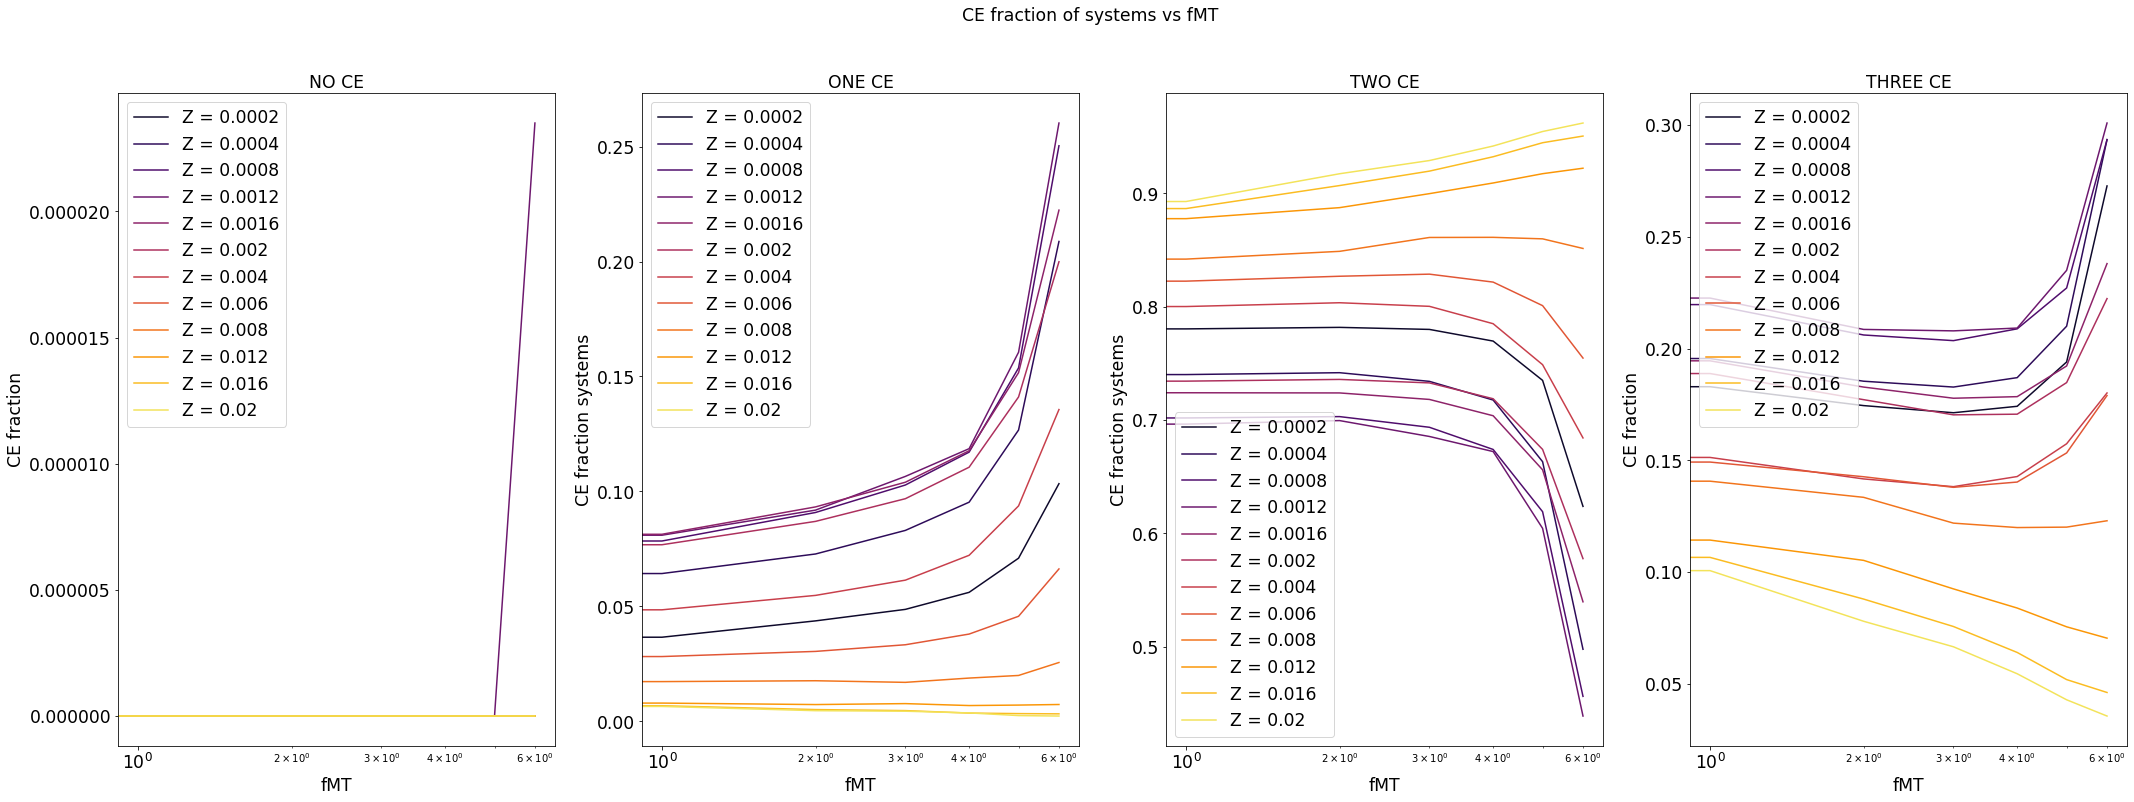

In [13]:
sns.set_palette('inferno', 12)

fig, ax = plt.subplots(1,4, figsize = (36,12))

for Z in metallicities :
        data = percent_CE[percent_CE['Z'] == Z]
        sns.lineplot( data['fMT'], data['NOT_CE_phase'], label = "Z = "+str(Z), ax = ax[0])
        sns.lineplot( data['fMT'], data['ONE_CE'], label = "Z = "+str(Z), ax = ax[1])
        sns.lineplot( data['fMT'], data['TWO_CE'], label = "Z = "+str(Z), ax = ax[2])
        sns.lineplot( data['fMT'], data['THREE_CE'], label = "Z = "+str(Z), ax = ax[3])

plt.suptitle('CE fraction of systems vs fMT', fontsize = 'xx-large')

ax[0].set_title('NO CE', fontsize = 'xx-large')
ax[0].set_xlabel('fMT', fontsize = 'xx-large')
ax[0].legend(fontsize = 'xx-large')
ax[0].set_ylabel('CE fraction', fontsize = 'xx-large')
ax[0].tick_params( labelsize = 'xx-large' )
ax[0].set_xscale( 'log' )

ax[1].set_title('ONE CE', fontsize = 'xx-large')
ax[1].set_xlabel('fMT', fontsize = 'xx-large')
ax[1].set_ylabel('CE fraction systems', fontsize = 'xx-large')
ax[1].legend(fontsize = 'xx-large')
ax[1].tick_params( labelsize = 'xx-large' )
ax[1].set_xscale( 'log' )

ax[2].set_title('TWO CE', fontsize = 'xx-large')
ax[2].set_xlabel('fMT', fontsize = 'xx-large')
ax[2].set_ylabel('CE fraction systems', fontsize = 'xx-large')
ax[2].legend(fontsize = 'xx-large')
ax[2].tick_params( labelsize = 'xx-large' )
ax[2].set_xscale( 'log' )


ax[3].set_title('THREE CE', fontsize = 'xx-large')
ax[3].set_xlabel('fMT', fontsize = 'xx-large')
ax[3].legend(fontsize = 'xx-large')
ax[3].set_ylabel('CE fraction', fontsize = 'xx-large')
ax[3].tick_params( labelsize = 'xx-large' )
ax[3].set_xscale( 'log' )

plt.show()

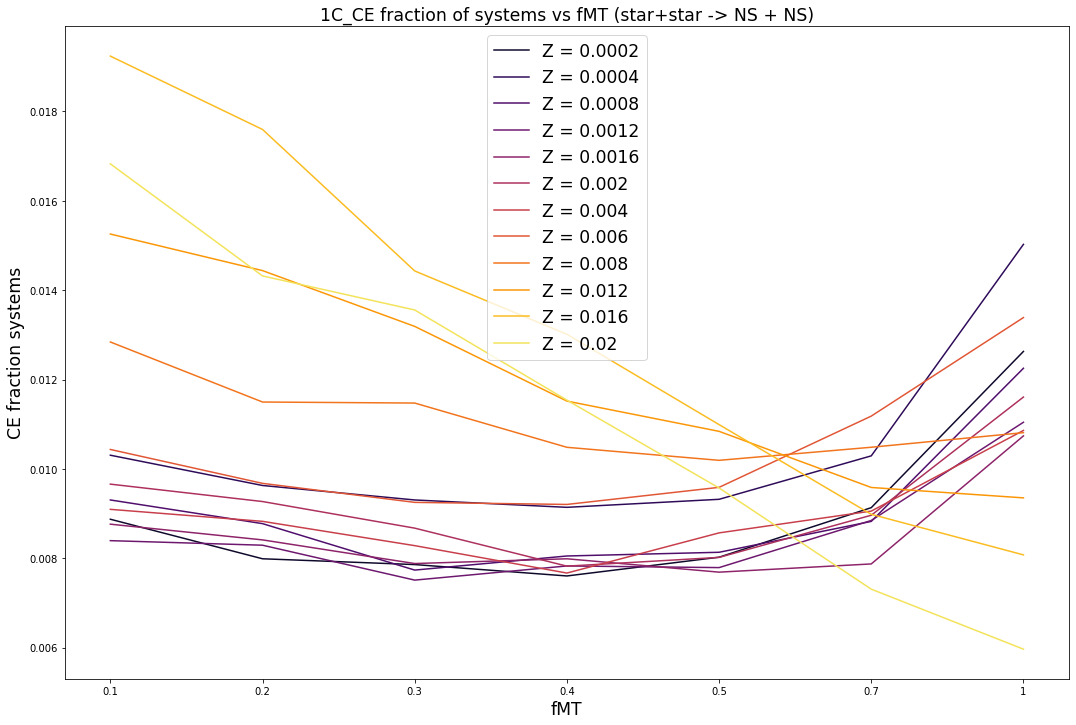

In [14]:
sns.set_palette('inferno', 12)

fig = plt.subplots(figsize = (18,12))
for Z in metallicities :
        data = percent_CE[percent_CE['Z'] == Z]
        sns.lineplot( data['fMT'], data['1C_CE'], label = "Z = "+str(Z))


plt.xlabel('fMT', fontsize = 'xx-large')
plt.ylabel('CE fraction systems', fontsize = 'xx-large')
plt.title('1C_CE fraction of systems vs fMT (star+star -> NS + NS)', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()

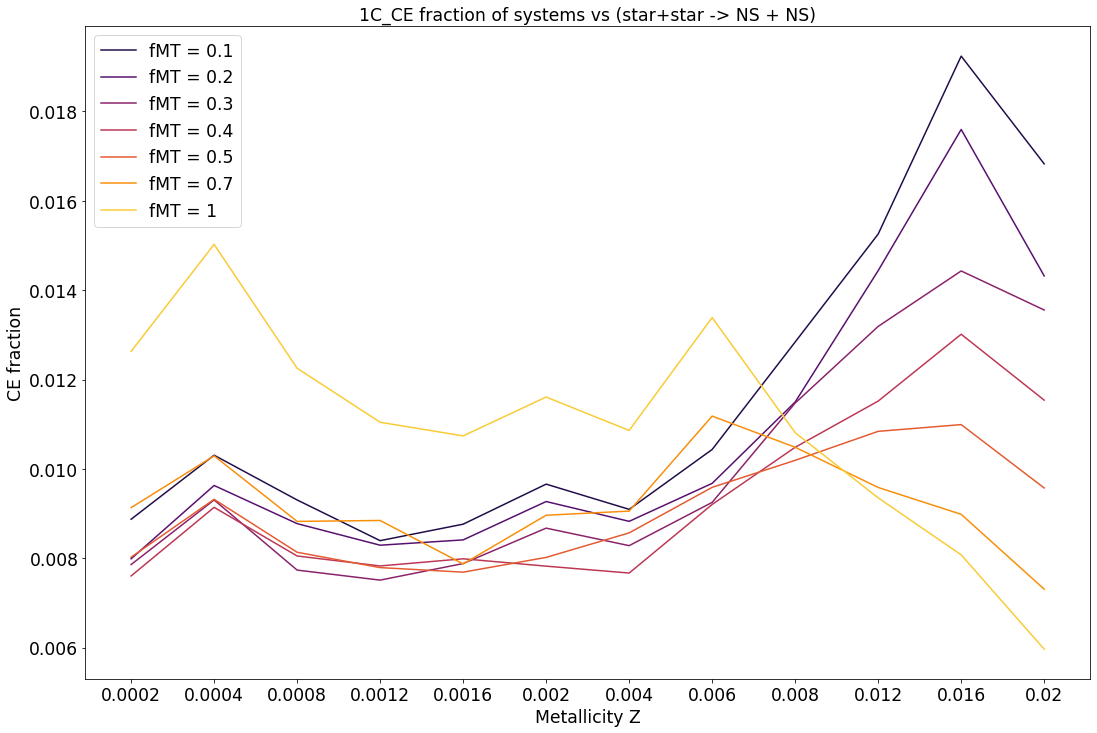

In [15]:
sns.set_palette('inferno', 7)

fig = plt.subplots(figsize = (18,12))
for fMT in fmt_to_csv :
        data = percent_CE[percent_CE['fMT'] == fMT]
        sns.lineplot( data['Z'], data['1C_CE'], label = "fMT = "+str(fMT), err_style = 'bars', err_kws = {} )


plt.xlabel('Metallicity Z', fontsize = 'xx-large')
plt.ylabel('CE fraction', fontsize = 'xx-large')
plt.tick_params( labelsize = 'xx-large' )
plt.title('1C_CE fraction of systems vs (star+star -> NS + NS)', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()

# Number and type of CE

In [16]:
fMT           = merger.loc[:,'fMT'].unique()
metallicities = merger.loc[:,'Z'].unique()

In [17]:
fmt_to_csv = ['0.1','0.2','0.3','0.4','0.5','0.7','1']

datas = pd.DataFrame(columns = ['first_one', 'second_one', 'third_one', 'fourth_one', 'fifth_one',
                                
                                'first_sec_two' , 'first_fourth_two' , 'first_fifth_two',
                                'second_fourth_two', 'second_fifth_two', 'fourth_fifth_two',
                                'first_third_two',
                                
                                'first_second_fifth_three', 'second_fourth_fifth_three', 'first_second_fourth_three',
                                
                                'Z', 'fMT'])

for sim_num, fMT_to_csv in zip(fMT, fmt_to_csv):
    
    for Z in metallicities:
        subindices = merger[(merger.loc[:,'Z'] == Z ) & (merger.loc[:,'fMT'] == sim_num)]
                
        tot_events = len(subindices)
        yes_CE = len(subindices[(subindices.loc[:,'1A_CE'])|(subindices.loc[:,'1B_CE'])|(subindices.loc[:,'1C_CE'])|(subindices.loc[:,'2A_CE'])|(subindices.loc[:,'2B_CE'])])
        no_CE  = tot_events - yes_CE
        
        one_CE   = (subindices[np.sum(subindices[['1A_CE', '1B_CE', '1C_CE', '2A_CE', '2B_CE']], axis = 1) == 1])
        two_CE   = (subindices[np.sum(subindices[['1A_CE', '1B_CE', '1C_CE', '2A_CE', '2B_CE']], axis = 1) == 2])
        three_CE = (subindices[np.sum(subindices[['1A_CE', '1B_CE', '1C_CE', '2A_CE', '2B_CE']], axis = 1) == 3])
        four_CE  = (subindices[np.sum(subindices[['1A_CE', '1B_CE', '1C_CE', '2A_CE', '2B_CE']], axis = 1) == 4])
                
        first_CE  = subindices[subindices['1A_CE']]
        second_CE = subindices[subindices['1B_CE']]
        third_CE  = subindices[subindices['1C_CE']]
        fourth_CE = subindices[subindices['2A_CE']]
        fifth_CE  = subindices[subindices['2B_CE']]
        
        ONE_A_one  = len(first_CE.loc[:,'ID'].isin(list(one_CE.loc[:,'ID'])))
        ONE_B_one  = len(second_CE.loc[:,'ID'].isin(list(one_CE.loc[:,'ID'])))
        ONE_C_one  = len(third_CE.loc[:,'ID'].isin(list(one_CE.loc[:,'ID'])))
        TWO_A_one  = len(fourth_CE.loc[:,'ID'].isin(list(one_CE.loc[:,'ID'])))
        TWO_B_one  = len(fifth_CE.loc[:,'ID'].isin(list(one_CE.loc[:,'ID'])))
        
        
        first_second_two  = len(two_CE[two_CE['1A_CE'] & two_CE['1B_CE']])
        first_third_two   = len(two_CE[two_CE['1A_CE'] & two_CE['1C_CE']])
        first_fourth_two  = len(two_CE[two_CE['1A_CE'] & two_CE['2A_CE']])
        first_fifth_two   = len(two_CE[two_CE['1A_CE'] & two_CE['2B_CE']])
        second_fourth_two = len(two_CE[two_CE['1B_CE'] & two_CE['2A_CE']])
        second_fifth_two  = len(two_CE[two_CE['1B_CE'] & two_CE['2B_CE']])
        fourth_fifth_two  = len(two_CE[two_CE['2A_CE'] & two_CE['2B_CE']])
        
        first_second_fifth_three  = len(three_CE[three_CE['1A_CE'] & three_CE['1B_CE'] & three_CE['2B_CE']])
        first_second_fourth_three = len(three_CE[three_CE['1A_CE'] & three_CE['1B_CE'] & three_CE['2A_CE']])
        second_fourth_fifth_three = len(three_CE[three_CE['1B_CE'] & three_CE['2A_CE'] & three_CE['2B_CE']])
        
        datas = datas.append({'first_one' : ONE_A_one, 'second_one' : ONE_B_one, 'third_one' : ONE_C_one, 'fourth_one' : TWO_A_one, 'fifth_one': TWO_B_one,
                                
                                'first_sec_two' : first_second_two, 'first_fourth_two' : first_fourth_two, 'first_fifth_two' : first_fifth_two,
                                'second_fourth_two' : second_fourth_two, 'second_fifth_two' : second_fifth_two, 'fourth_fifth_two': fourth_fifth_two,
                                'first_third_two': first_third_two,

                              'first_second_fifth_three' : first_second_fifth_three, 'second_fourth_fifth_three' : first_second_fourth_three, 'first_second_fourth_three': first_second_fourth_three,
                              
                              'Z': Z, 'fMT': fMT_to_csv}, ignore_index = True )
datas

,first_one,second_one,third_one,fourth_one,fifth_one,first_sec_two,first_fourth_two,first_fifth_two,second_fourth_two,second_fifth_two,fourth_fifth_two,first_third_two,first_second_fifth_three,second_fourth_fifth_three,first_second_fourth_three,Z,fMT
0,25971,8178,1089,113657,117529,16,222,379,128,149,92262,1089,6816,0,0,0.0002,0.1
1,17206,9523,738,60444,66814,17,211,641,58,89,50760,738,8984,0,0,0.0004,0.1
2,15708,9871,548,47140,54401,28,184,795,47,130,39690,548,9452,0,0,0.0008,0.1
3,15498,9527,477,45506,52367,33,198,805,45,109,37758,477,9112,0,0,0.0012,0.1
4,13978,9038,495,45529,52159,44,141,775,15,205,39034,495,8713,0,0,0.0016,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,9552,4549,546,34062,37455,22,52,1611,5,8,28535,546,4367,0,0,0.006,1
80,8740,4209,547,43899,48710,7,25,1895,6,12,40582,547,4116,0,0,0.008,1
81,7191,3308,553,52805,58121,6,11,2418,1,32,51506,553,3254,0,0,0.012,1
82,6400,2528,511,57268,62525,5,14,2930,0,21,56657,511,2498,0,0,0.016,1


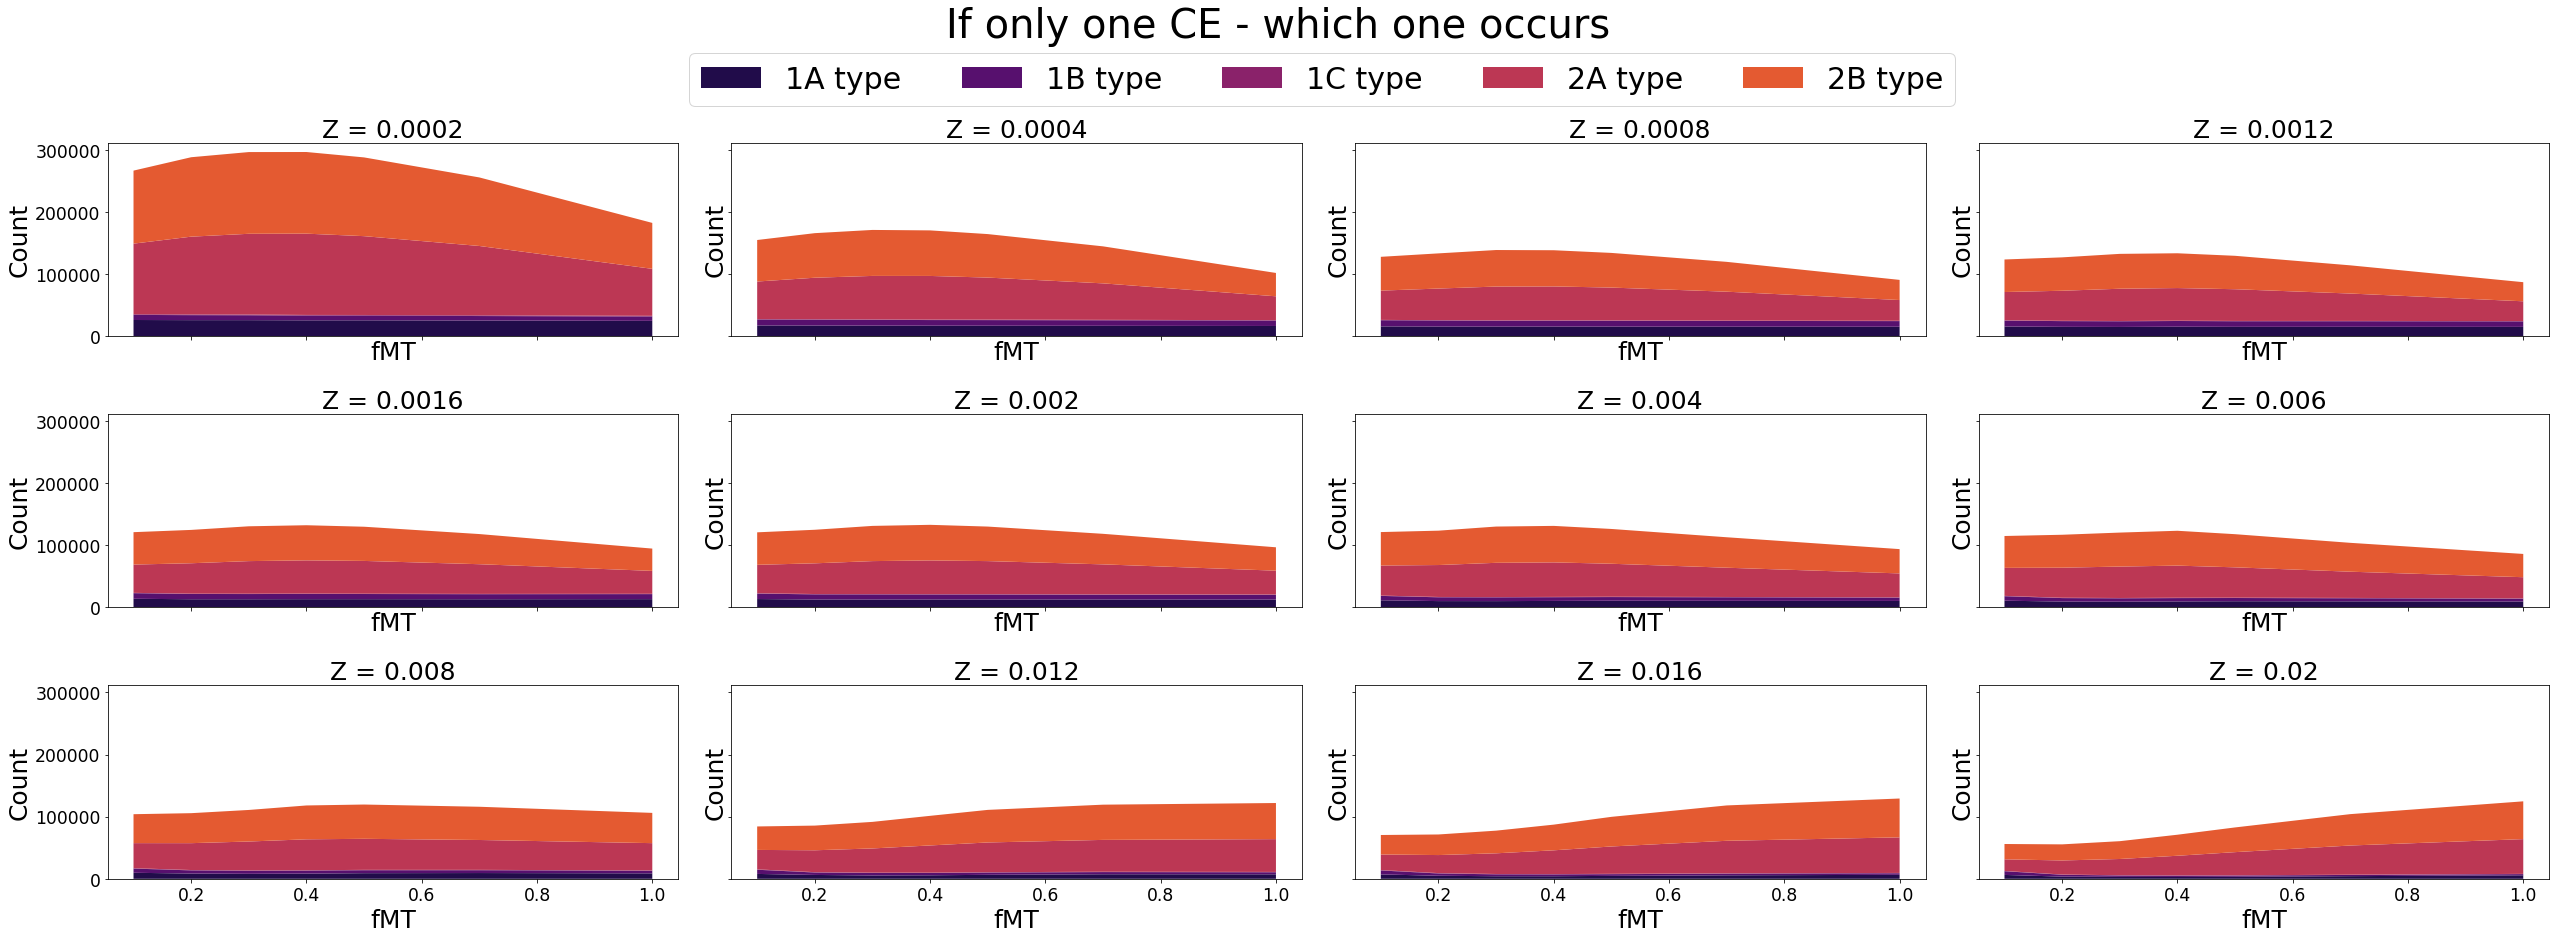

In [18]:
fig, ax = plt.subplots(3,4, figsize = (36,12), sharey = True, sharex = True)

sns.set_palette('inferno', 5)

    
for Z, i in zip(metallicities, range(len(metallicities))):
    
    datas_subsub = datas[datas['Z'] == Z]

    ax[i//4, i%4].stackplot(datas_subsub['fMT'].astype(float), 
                            datas_subsub['first_one'].astype(float), 
                            datas_subsub['second_one'].astype(float), 
                            datas_subsub['third_one'].astype(float),
                            datas_subsub['fourth_one'].astype(float),
                            datas_subsub['fifth_one'].astype(float))
    
    ax[i//4, i%4].set_title("Z = "+str(Z), fontsize = '25')
#    ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_ylabel('Count', fontsize = '25')
    ax[i//4, i%4].set_xlabel('fMT', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 'xx-large' )

plt.tight_layout(pad = 2.5)
plt.suptitle('If only one CE - which one occurs', fontsize = '40', y = 1.1)
plt.legend(bbox_to_anchor = (-1.15 ,4.35), loc="upper center",labels = ["1A type", "1B type", "1C type", "2A type", "2B type"], fontsize = '30', ncol = 5)

plt.show()

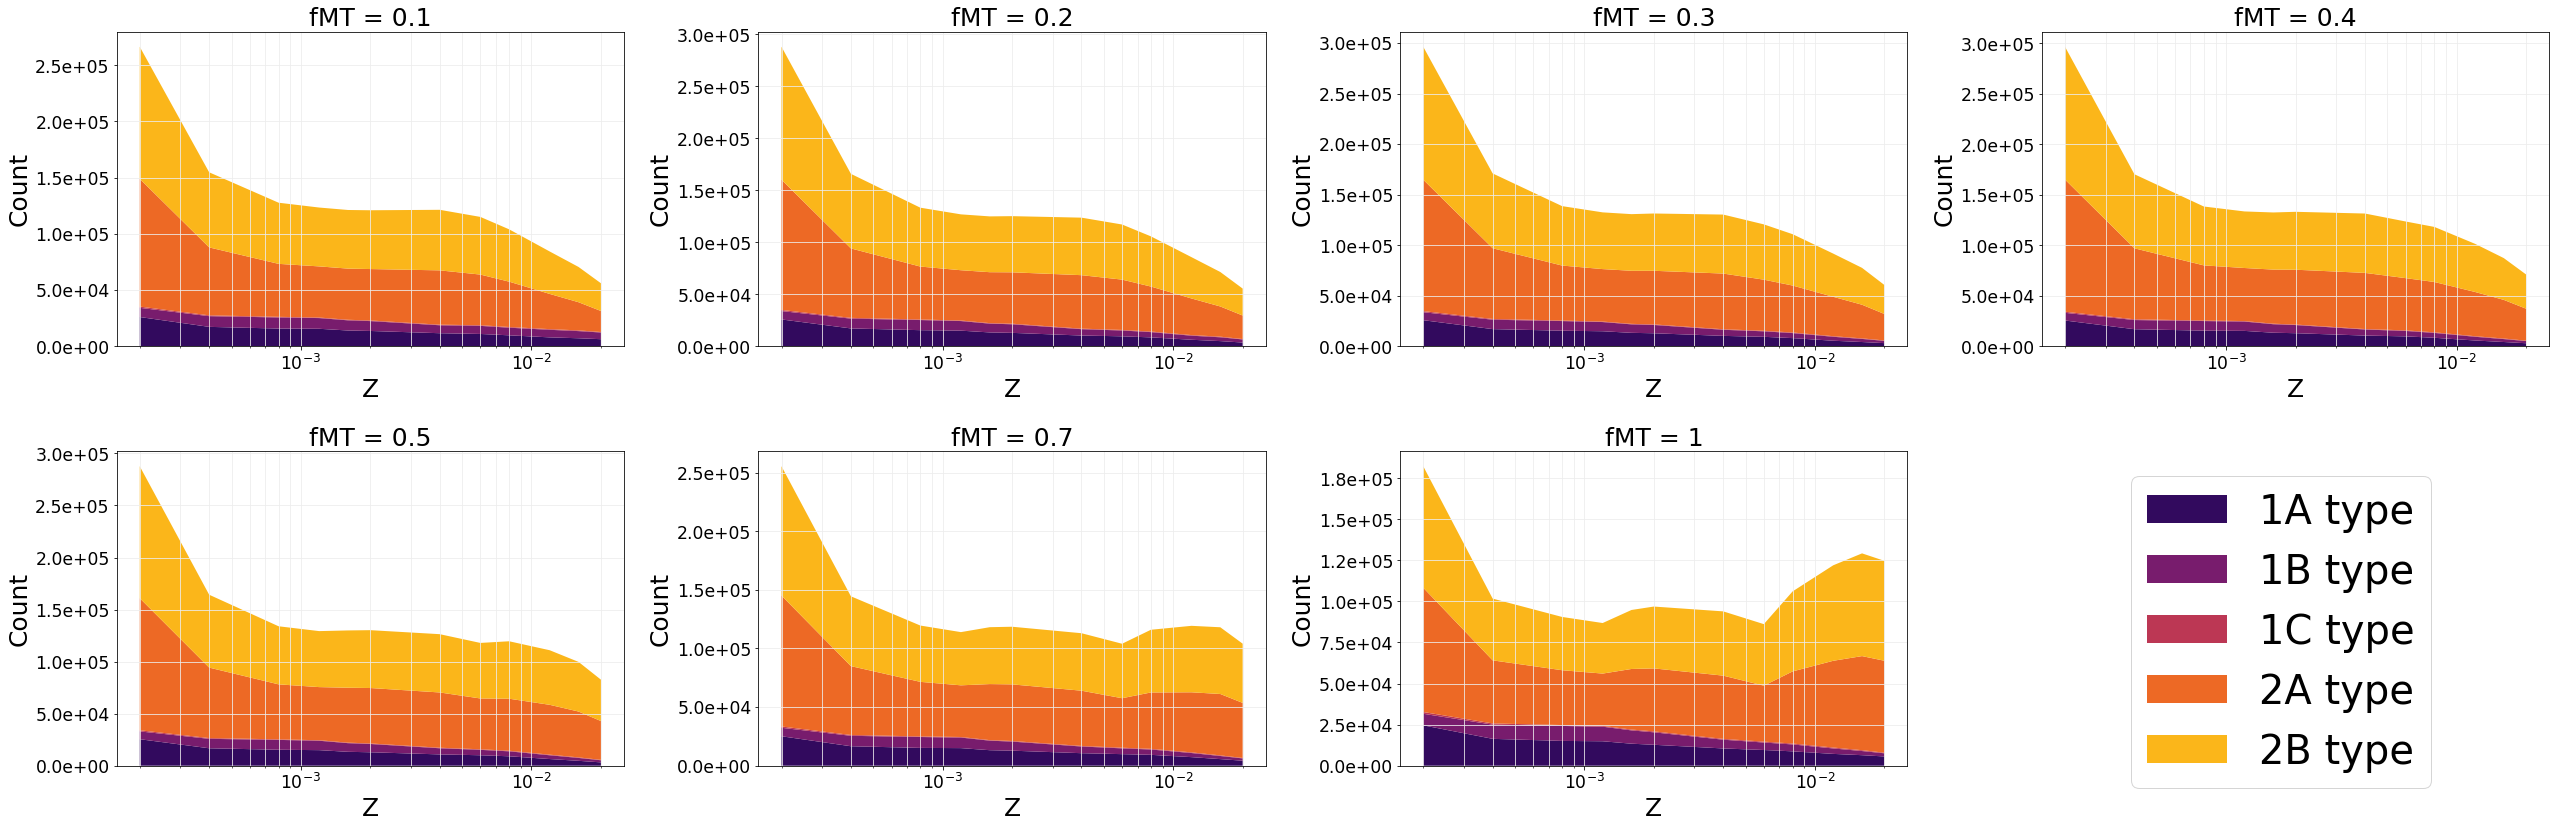

In [19]:
sns.set_palette('inferno', 5)
import matplotlib.ticker as mtick


fig, ax = plt.subplots(2,4, figsize = (36,12))


for sim_num, i in zip(fmt_to_csv, range(len(fmt_to_csv))):
    
    datas_subsub = datas[datas['fMT'] == sim_num]
    ax[i//4, i%4].stackplot(datas_subsub['Z'].astype(float), 
                            datas_subsub['first_one'].astype(float), 
                            datas_subsub['second_one'].astype(float), 
                            datas_subsub['third_one'].astype(float),
                            datas_subsub['fourth_one'].astype(float),
                            datas_subsub['fifth_one'].astype(float))
    
    ax[i//4, i%4].set_title("fMT = "+str(sim_num), fontsize = '25')
#     ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_xscale('log')
    ax[i//4, i%4].set_ylabel('Count', fontsize = '25')
    ax[i//4, i%4].set_xlabel('Z', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 'xx-large' )
    ax[i//4, i%4].grid(True, which="both" ,ls="-",color='0.93')
    ax[i//4, i%4].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))


ax[1, 3].axis('off')

plt.tight_layout(pad = 2.5)
# plt.suptitle('ONE CE', fontsize = '40')

fig.legend(bbox_to_anchor = (0.88 , 0.43), loc="upper center",labels = ["1A type", "1B type", "1C type", "2A type", "2B type"], fontsize = '40', ncol = 1)
plt.savefig('ONE_CE_which.png')
plt.show()

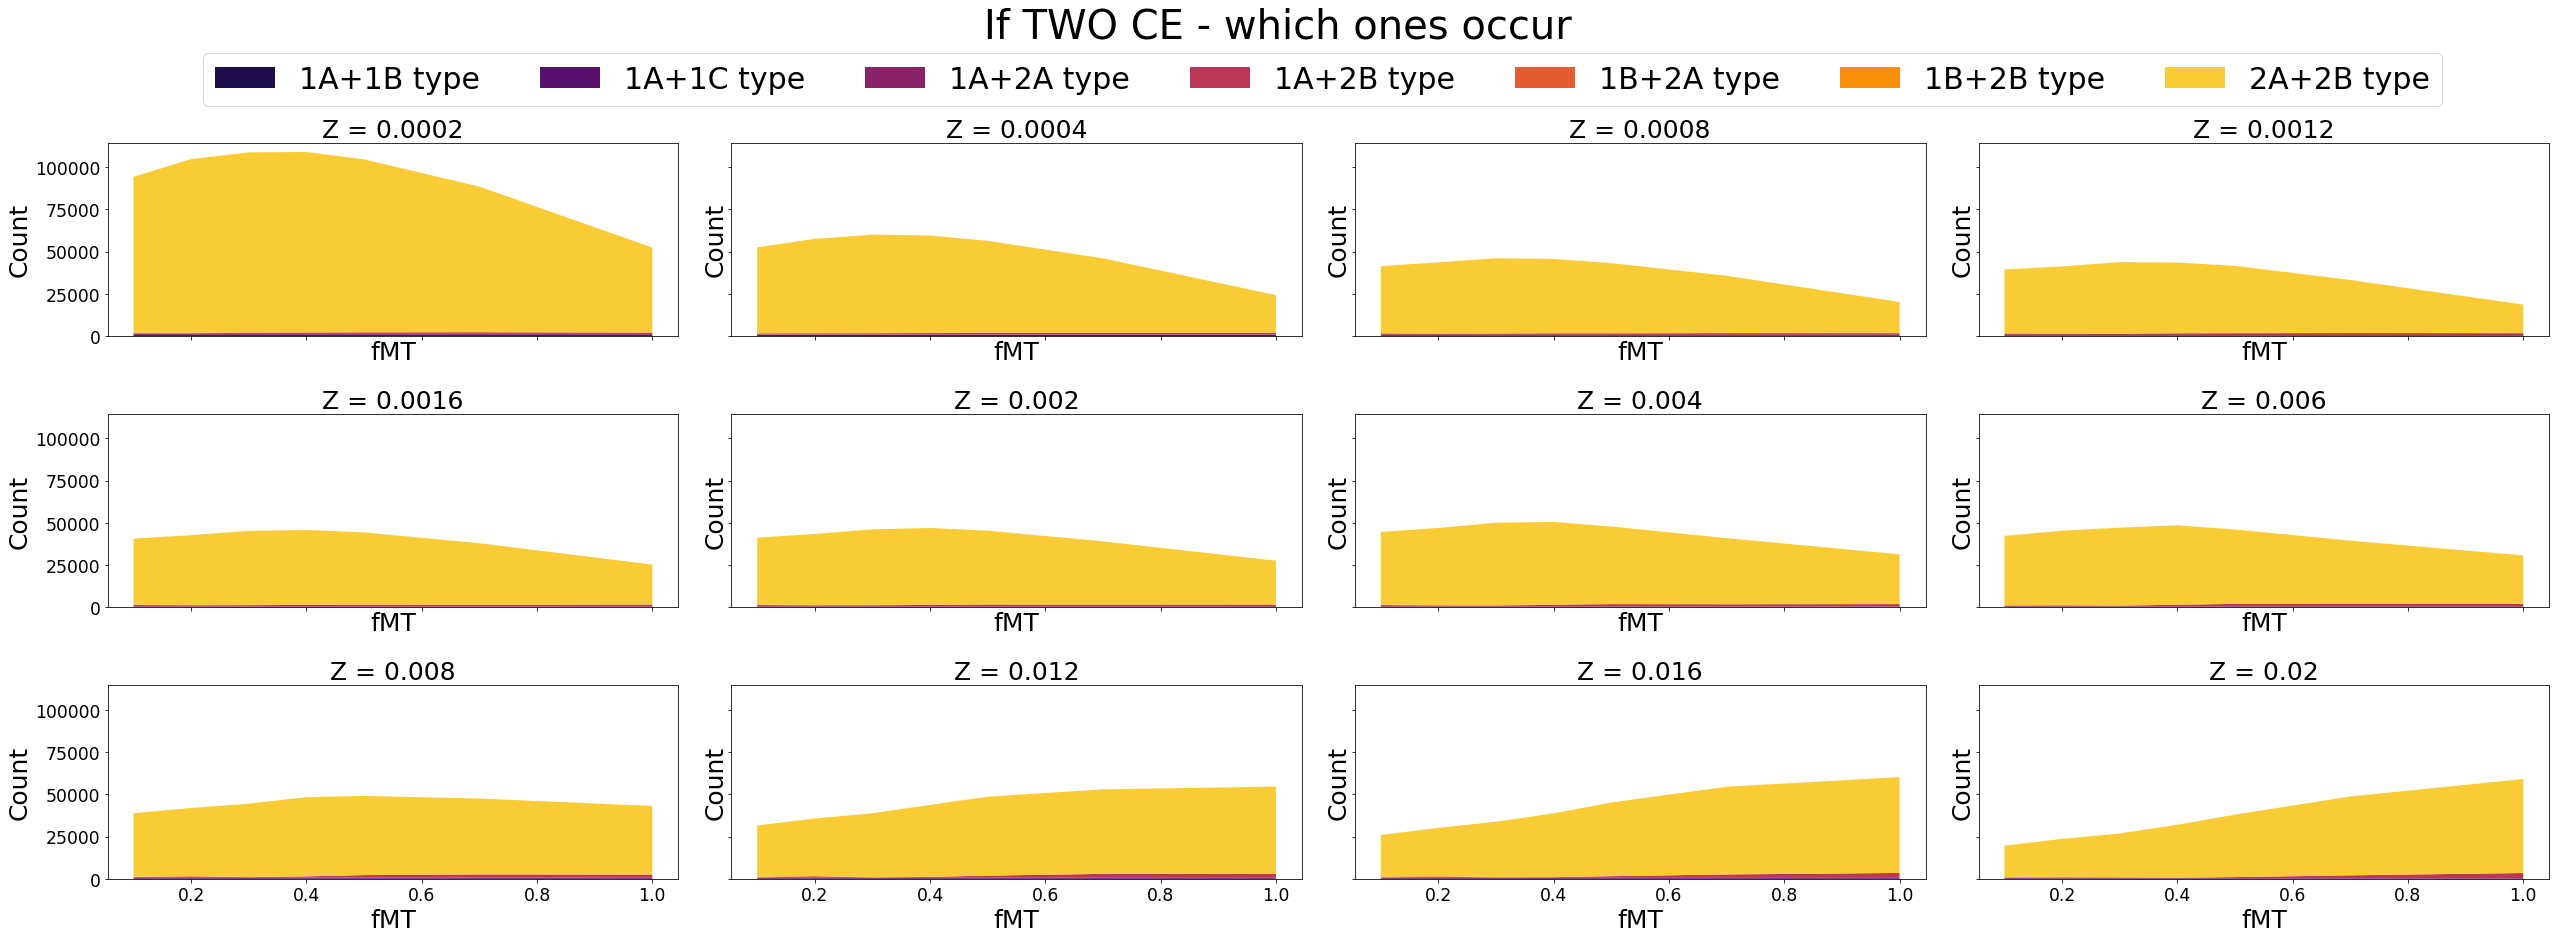

In [20]:
sns.set_palette('inferno', 7)

fig, ax = plt.subplots(3,4, figsize = (36,12), sharey = True, sharex = True)
    
for Z, i in zip(metallicities, range(len(metallicities))):
    
    datas_subsub = datas[datas['Z'] == Z]
    ax[i//4, i%4].stackplot(datas_subsub['fMT'].astype(float), 
                            datas_subsub['first_sec_two'].astype(float),
                            datas_subsub['first_third_two'].astype(float),
                            datas_subsub['first_fourth_two'].astype(float),
                            datas_subsub['first_fifth_two'].astype(float),
                            datas_subsub['second_fourth_two'].astype(float),
                            datas_subsub['second_fifth_two'].astype(float),
                            datas_subsub['fourth_fifth_two'].astype(float))
    
    ax[i//4, i%4].set_title("Z = "+str(Z), fontsize = '25')
 #   ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_ylabel('Count', fontsize = '25')
    ax[i//4, i%4].set_xlabel('fMT', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 'xx-large' )

plt.tight_layout(pad = 2.5)
plt.suptitle('If TWO CE - which ones occur', fontsize = '40', y = 1.1)
plt.legend(bbox_to_anchor = (-1.15 ,4.35), loc="upper center",labels = ["1A+1B type", "1A+1C type" ,"1A+2A type", "1A+2B type", "1B+2A type", "1B+2B type", "2A+2B type"], fontsize = '30', ncol = 7)
plt.show()

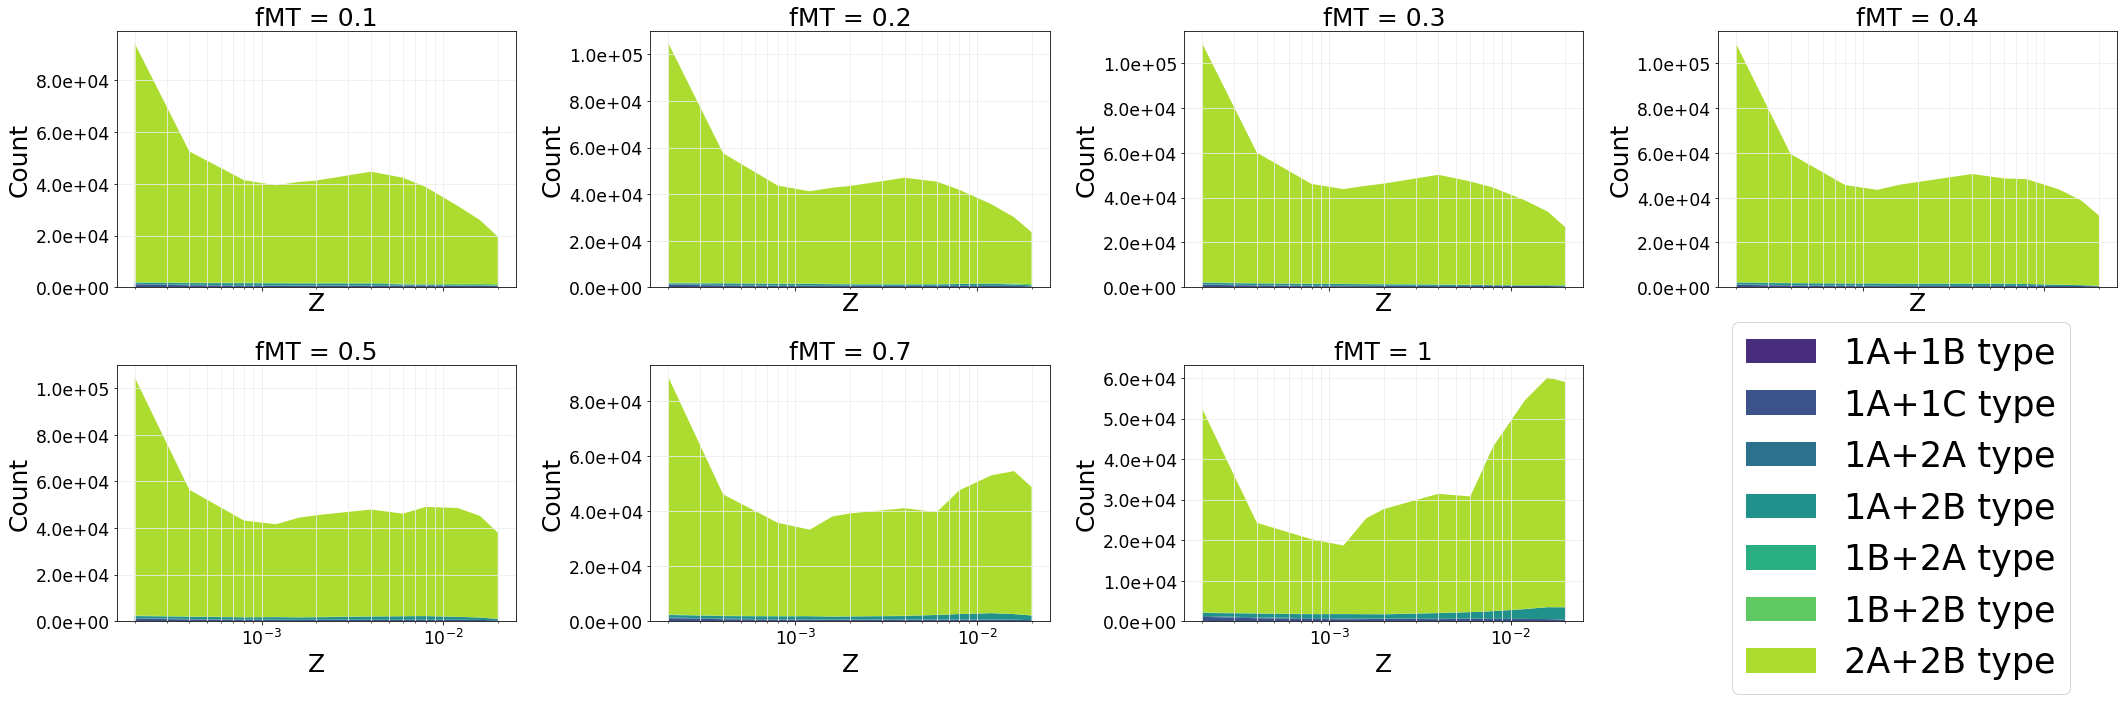

In [21]:
sns.set_palette('viridis', 7)


fig, ax = plt.subplots(2,4, figsize = (30,10), sharex = True)


for sim_num, i in zip(fmt_to_csv, range(len(fMT))):
    
    datas_subsub = datas[datas['fMT'] == sim_num]
    
    ax[i//4, i%4].stackplot(datas_subsub['Z'].astype(float),
                            datas_subsub['first_sec_two'].astype(float), 
                            datas_subsub['first_third_two'].astype(float),
                            datas_subsub['first_fourth_two'].astype(float),
                            datas_subsub['first_fifth_two'].astype(float),
                            datas_subsub['second_fourth_two'].astype(float),
                            datas_subsub['second_fifth_two'].astype(float),
                            datas_subsub['fourth_fifth_two'].astype(float))
    
    ax[i//4, i%4].set_title("fMT = "+str(sim_num), fontsize = '25')
#     ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_xscale('log')
    ax[i//4, i%4].set_ylabel('Count', fontsize = '25')
    ax[i//4, i%4].set_xlabel('Z', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 'xx-large' )
    ax[i//4, i%4].grid(True, which="both" ,ls="-",color='0.93')
    ax[i//4, i%4].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))


ax[1, 3].axis('off')

plt.tight_layout(pad = 2.5)
# plt.suptitle('TWO CE', fontsize = '40')
fig.legend(bbox_to_anchor = (0.88 , 0.55), loc="upper center",labels = ["1A+1B type", "1A+1C type" ,"1A+2A type", "1A+2B type", "1B+2A type", "1B+2B type", "2A+2B type"], fontsize = '35', ncol = 1)
plt.savefig('TWO_CE_which.png')

plt.show()

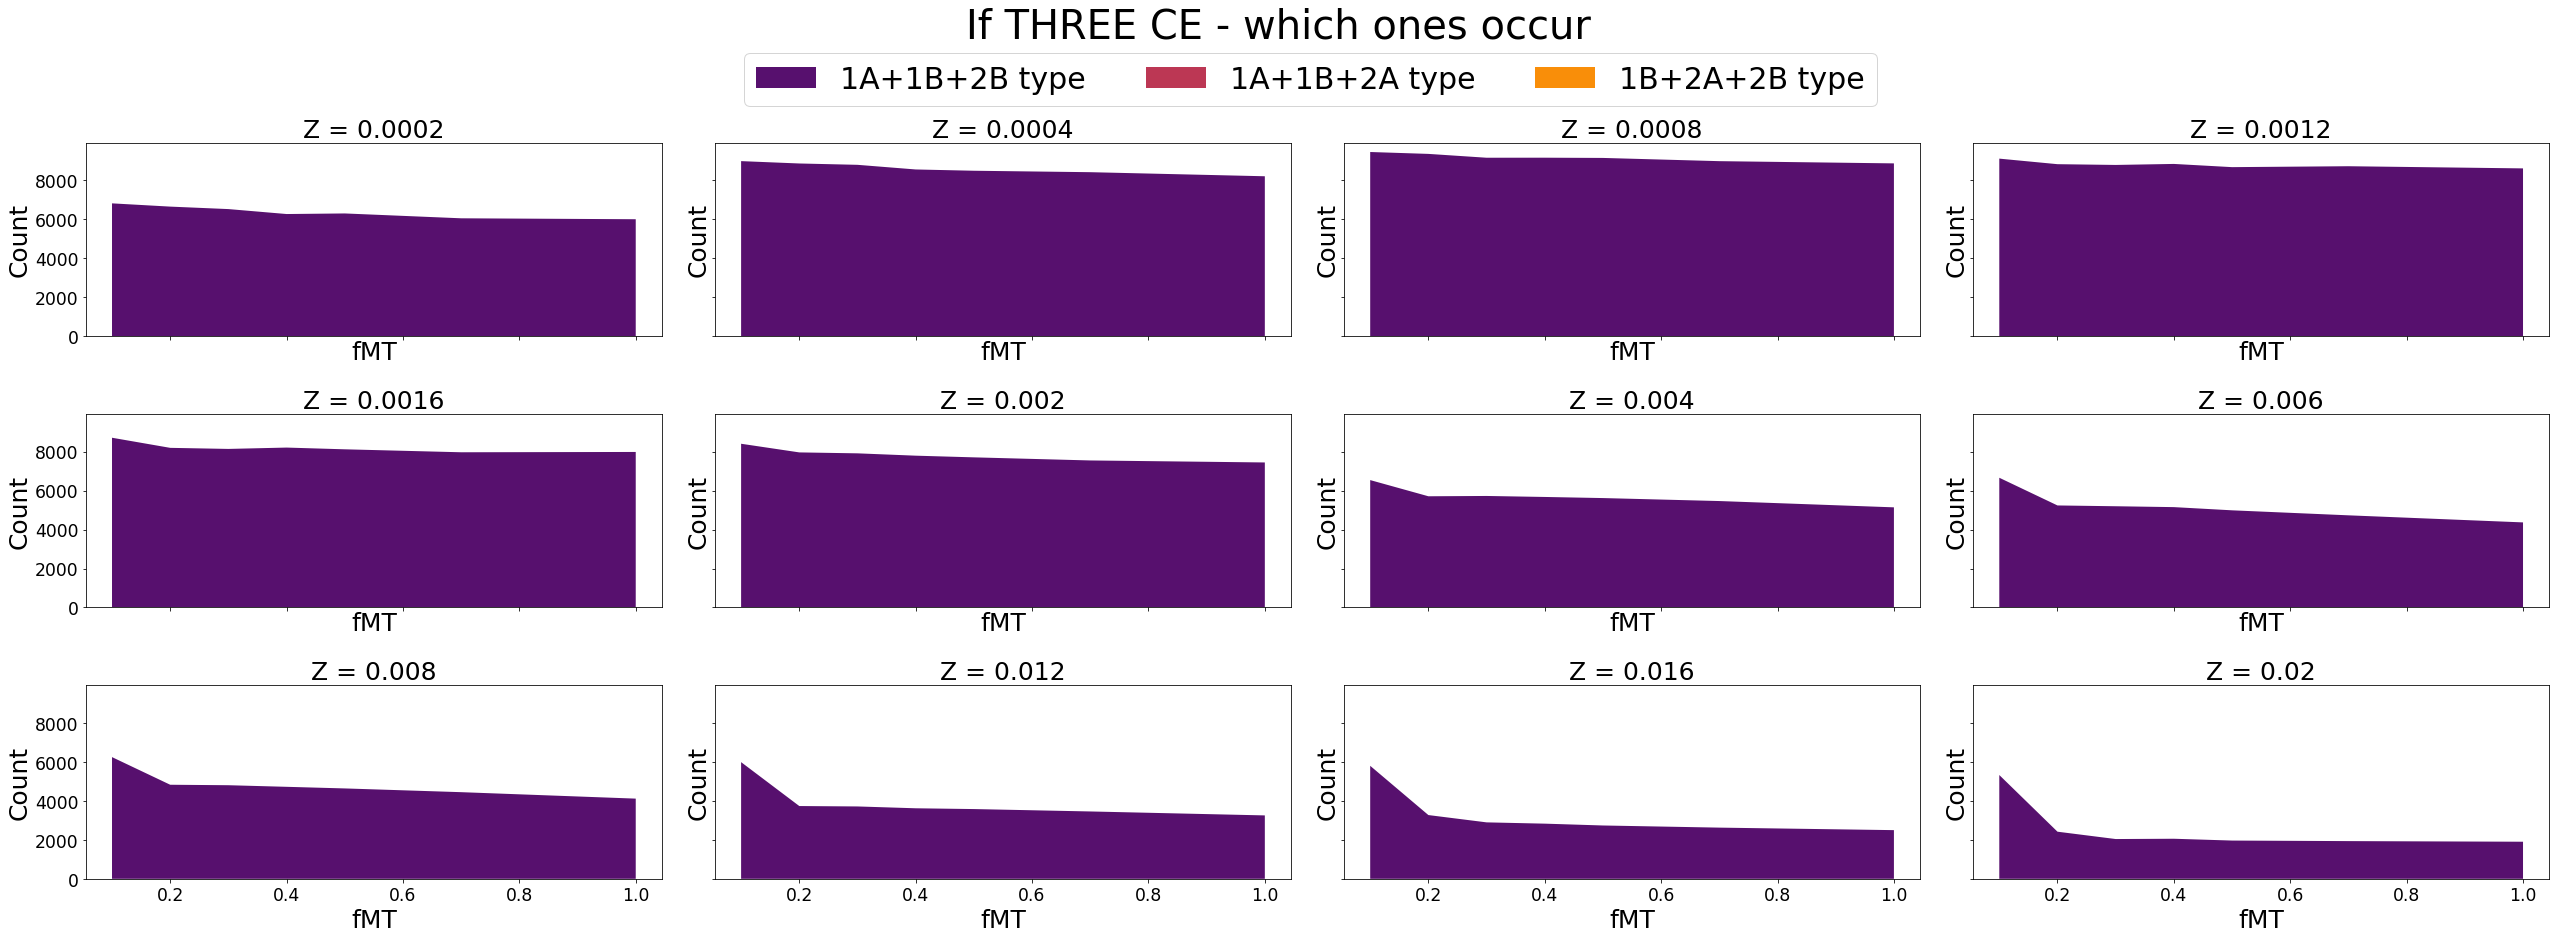

In [22]:
sns.set_palette('inferno', 3)

fig, ax = plt.subplots(3,4, figsize = (36,12), sharey = True, sharex = True)
    
for Z, i in zip(metallicities, range(len(metallicities))):
    
    datas_subsub = datas[datas['Z'] == Z]

    ax[i//4, i%4].stackplot(datas_subsub['fMT'].astype(float), 
                            datas_subsub['first_second_fifth_three'].astype(float),
                            datas_subsub['first_second_fourth_three'].astype(float),
                            datas_subsub['second_fourth_fifth_three'].astype(float)) 
    
    ax[i//4, i%4].set_title("Z = "+str(Z), fontsize = '25')
#    ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_ylabel('Count', fontsize = '25')
    ax[i//4, i%4].set_xlabel('fMT', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 'xx-large' )

plt.tight_layout(pad = 2.5)
plt.suptitle('If THREE CE - which ones occur', fontsize = '40', y = 1.1)
plt.legend(bbox_to_anchor = (-1.15 ,4.35), loc="upper center",labels = ["1A+1B+2B type", "1A+1B+2A type"  ,"1B+2A+2B type"], fontsize = '30', ncol = 5)

plt.show()

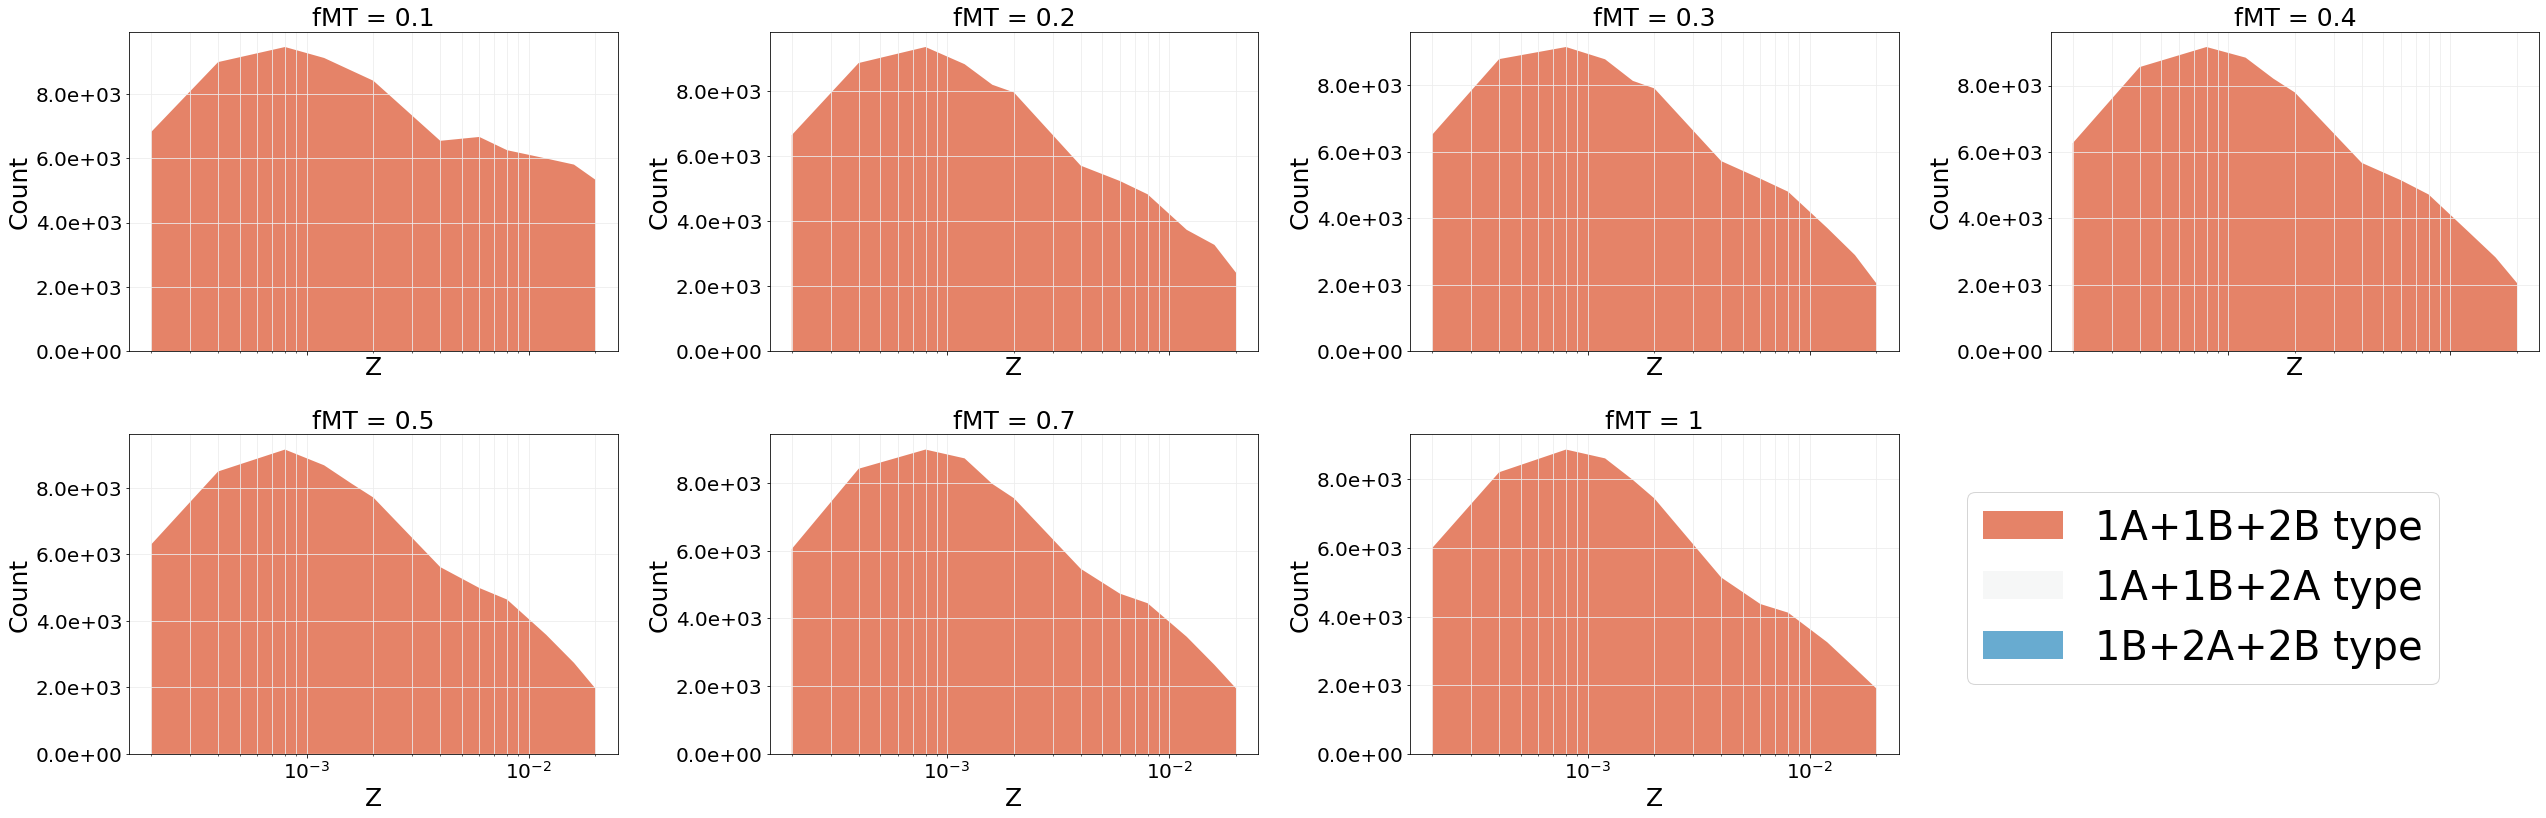

In [23]:
sns.set_palette('RdBu', 3)


fig, ax = plt.subplots(2,4, figsize = (36,12), sharex = True)



for sim_num, i in zip(fmt_to_csv, range(len(fmt_to_csv))):
    
    datas_subsub = datas[datas['fMT'] == sim_num]
    ax[i//4, i%4].stackplot(datas_subsub['Z'].astype(float), 
                            datas_subsub['first_second_fifth_three'].astype(float),
                            datas_subsub['first_second_fourth_three'].astype(float),
                            datas_subsub['second_fourth_fifth_three'].astype(float)) 
    
    ax[i//4, i%4].set_title("fMT = "+str(sim_num), fontsize = '25')
#     ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_xscale('log')
    ax[i//4, i%4].set_ylabel('Count', fontsize = '25', labelpad = 4)
    ax[i//4, i%4].set_xlabel('Z', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 20 )
    ax[i//4, i%4].grid(True, which="both" ,ls="-",color='0.93')
    ax[i//4, i%4].yaxis.set_tick_params(labelsize= 20)
    ax[i//4, i%4].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

    
ax[1, 3].axis('off')

plt.tight_layout(pad = 3)
# plt.suptitle('THREE CE', fontsize = '40', y = 1.00)
fig.legend(bbox_to_anchor = (0.85 , 0.4), loc="upper center",labels = ["1A+1B+2B type", "1A+1B+2A type"  ,"1B+2A+2B type"], fontsize = '40', ncol = 1)
plt.savefig('THREE_CE_which.png')
plt.show()

# Percentage stacked Data plots

In [24]:
datas

,first_one,second_one,third_one,fourth_one,fifth_one,first_sec_two,first_fourth_two,first_fifth_two,second_fourth_two,second_fifth_two,fourth_fifth_two,first_third_two,first_second_fifth_three,second_fourth_fifth_three,first_second_fourth_three,Z,fMT
0,25971,8178,1089,113657,117529,16,222,379,128,149,92262,1089,6816,0,0,0.0002,0.1
1,17206,9523,738,60444,66814,17,211,641,58,89,50760,738,8984,0,0,0.0004,0.1
2,15708,9871,548,47140,54401,28,184,795,47,130,39690,548,9452,0,0,0.0008,0.1
3,15498,9527,477,45506,52367,33,198,805,45,109,37758,477,9112,0,0,0.0012,0.1
4,13978,9038,495,45529,52159,44,141,775,15,205,39034,495,8713,0,0,0.0016,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,9552,4549,546,34062,37455,22,52,1611,5,8,28535,546,4367,0,0,0.006,1
80,8740,4209,547,43899,48710,7,25,1895,6,12,40582,547,4116,0,0,0.008,1
81,7191,3308,553,52805,58121,6,11,2418,1,32,51506,553,3254,0,0,0.012,1
82,6400,2528,511,57268,62525,5,14,2930,0,21,56657,511,2498,0,0,0.016,1


In [25]:
total_one   = np.sum(datas.iloc[:,0:5], axis = 1)
total_two   = np.sum(datas.iloc[:,5:12], axis = 1)
total_three = np.sum(datas.iloc[:,12:15], axis = 1)

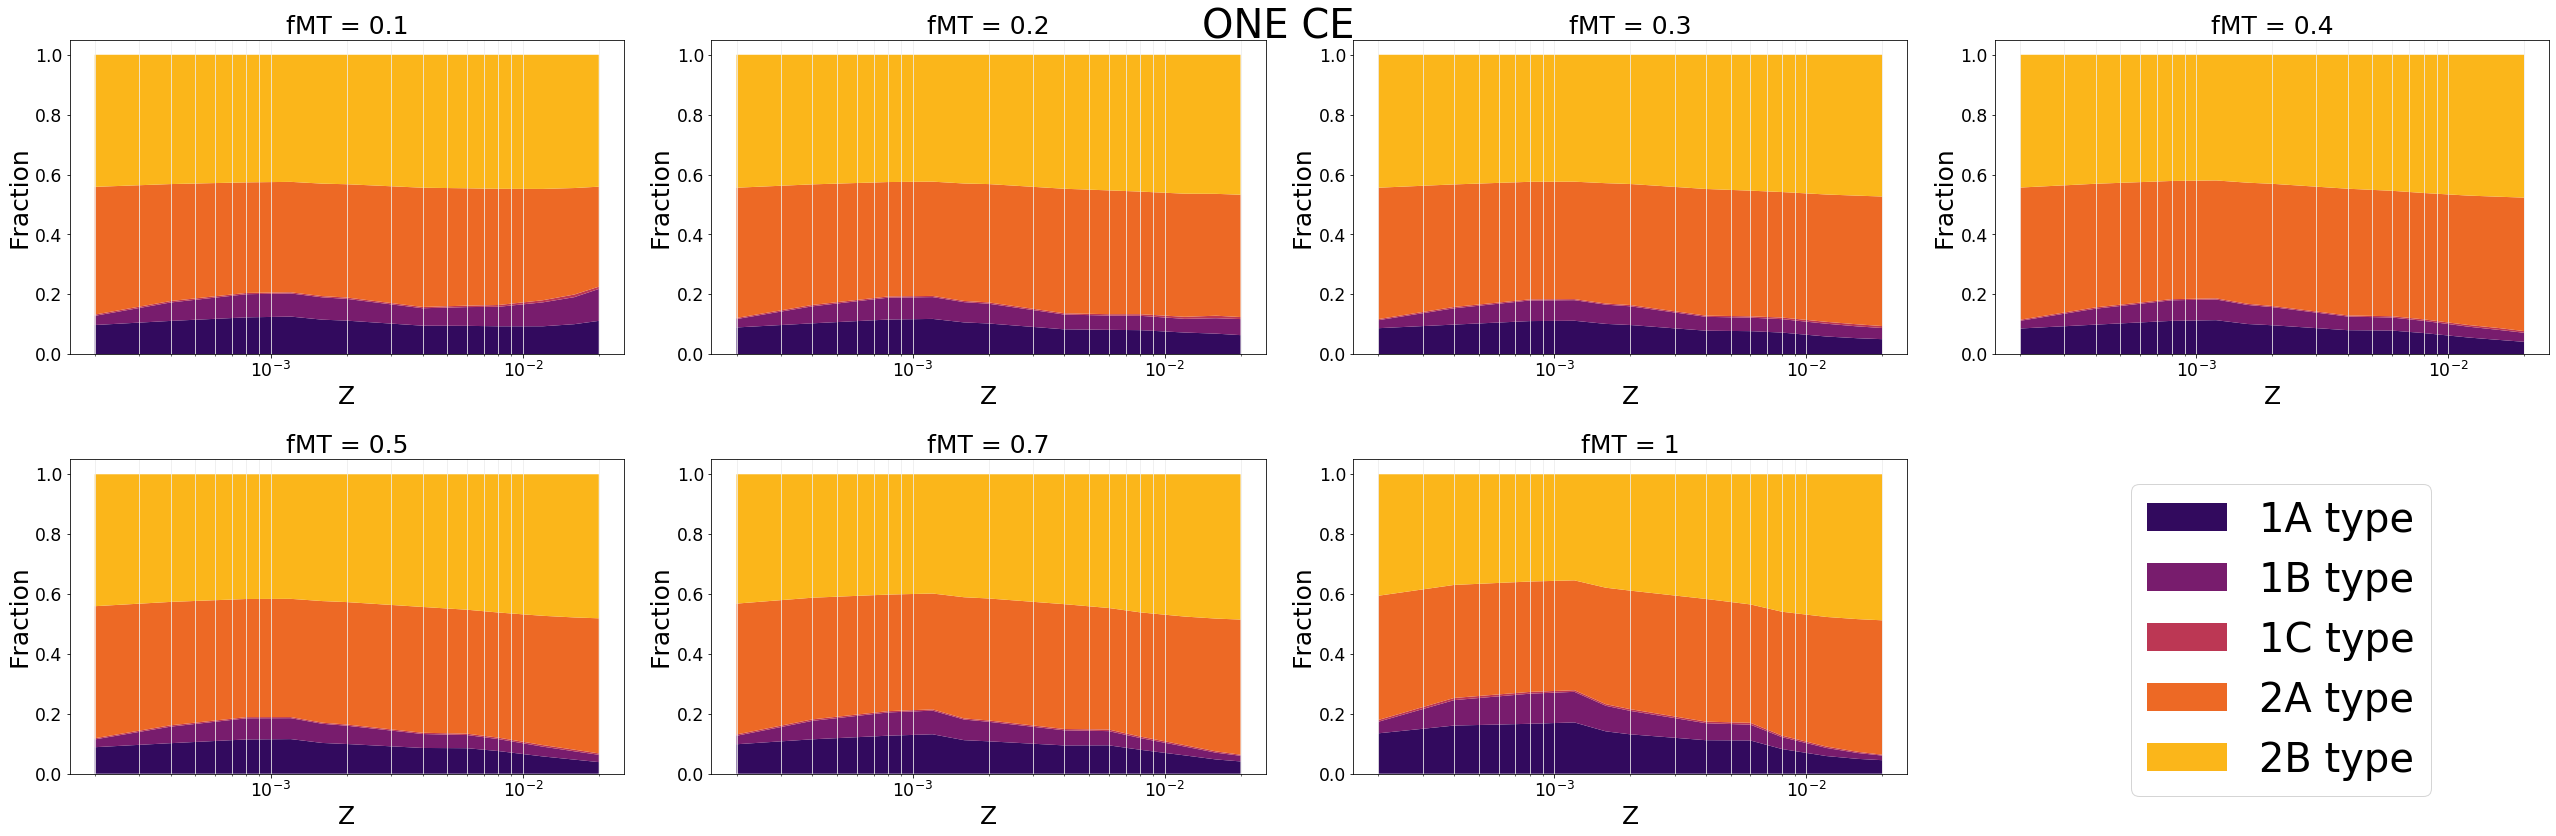

In [26]:
sns.set_palette('inferno', 5)


fig, ax = plt.subplots(2,4, figsize = (36,12))


for sim_num, i in zip(fmt_to_csv, range(len(fmt_to_csv))):
    
    datas_subsub = datas[datas['fMT'] == sim_num]
    ax[i//4, i%4].stackplot(datas_subsub['Z'].astype(float), 
                            datas_subsub['first_one'].astype(float)/total_one[i*12:(i+1)*12], 
                            datas_subsub['second_one'].astype(float)/total_one[i*12:(i+1)*12], 
                            datas_subsub['third_one'].astype(float)/total_one[i*12:(i+1)*12],
                            datas_subsub['fourth_one'].astype(float)/total_one[i*12:(i+1)*12],
                            datas_subsub['fifth_one'].astype(float)/total_one[i*12:(i+1)*12])
    
    ax[i//4, i%4].set_title("fMT = "+str(sim_num), fontsize = '25')
    ax[i//4, i%4].set_xscale('log')
#     ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_ylabel('Fraction', fontsize = '25')
    ax[i//4, i%4].set_xlabel('Z', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 'xx-large' )
    ax[i//4, i%4].grid(True, which="both", axis = 'x' ,ls="-",color='0.93')    


ax[1, 3].axis('off')

plt.tight_layout(pad = 2.5)
plt.suptitle('ONE CE', fontsize = '40')
fig.legend(bbox_to_anchor = (0.88 , 0.43), loc="upper center",labels = ["1A type", "1B type", "1C type", "2A type", "2B type"], fontsize = '40', ncol = 1)
plt.savefig('ONE_CE_which.png')
plt.show()

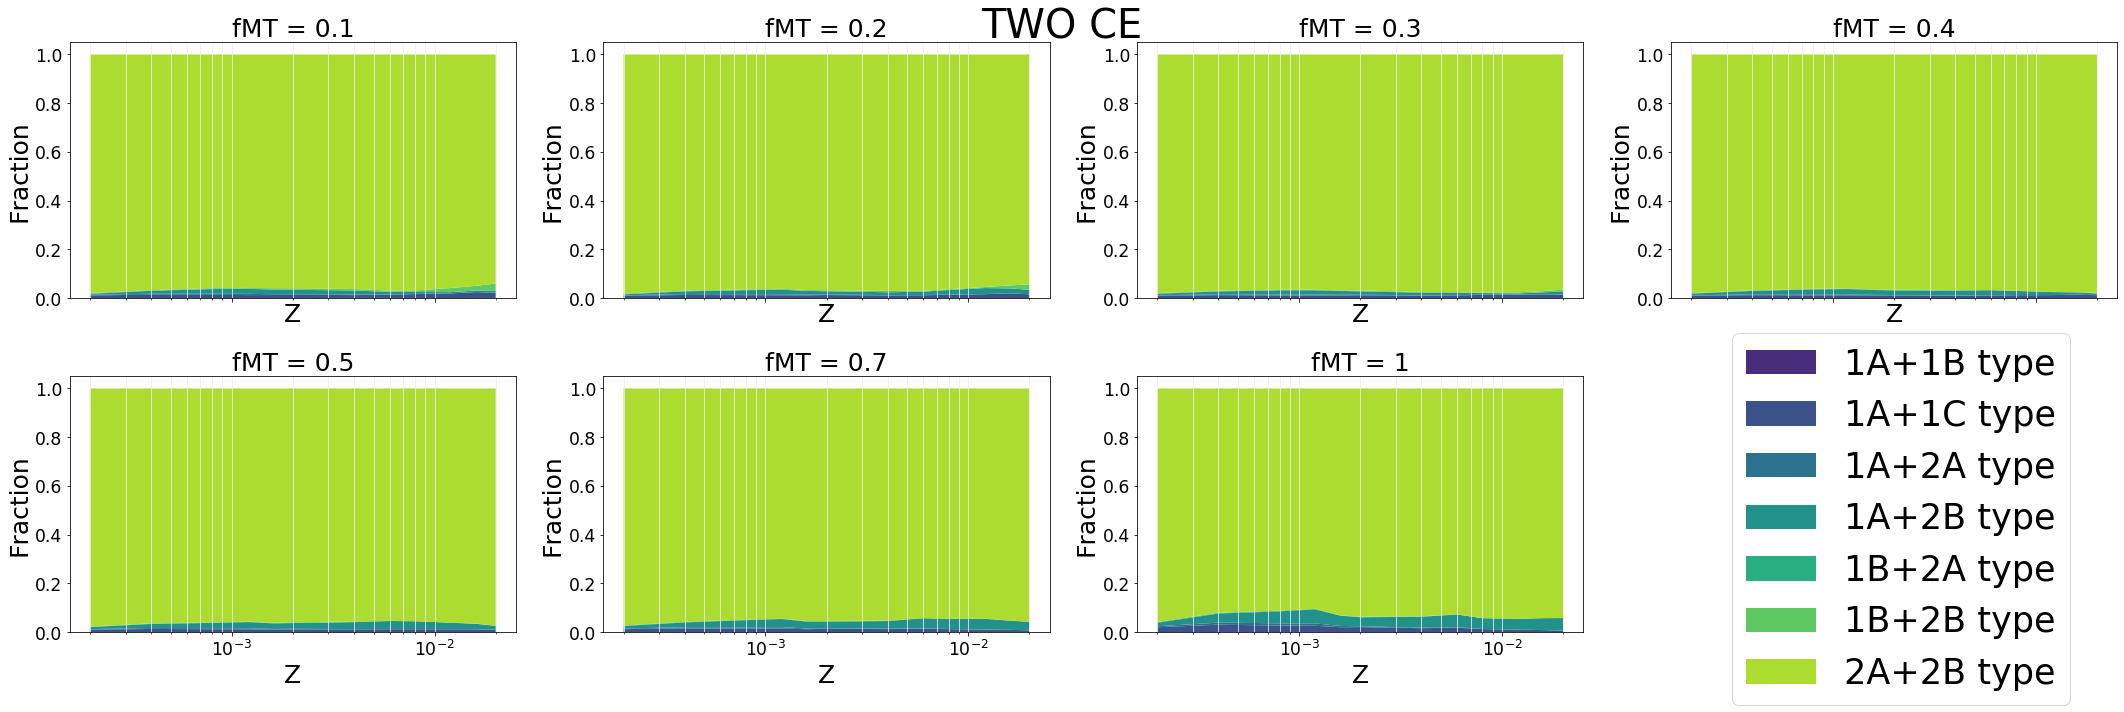

In [27]:
sns.set_palette('viridis', 7)


fig, ax = plt.subplots(2,4, figsize = (30,10), sharex = True)


for sim_num, i in zip(fmt_to_csv, range(len(fMT))):
    
    datas_subsub = datas[datas['fMT'] == sim_num]
    
    ax[i//4, i%4].stackplot(datas_subsub['Z'].astype(float),
                            datas_subsub['first_sec_two'].astype(float)/total_two[i*12:(i+1)*12], 
                            datas_subsub['first_third_two'].astype(float)/total_two[i*12:(i+1)*12],
                            datas_subsub['first_fourth_two'].astype(float)/total_two[i*12:(i+1)*12],
                            datas_subsub['first_fifth_two'].astype(float)/total_two[i*12:(i+1)*12],
                            datas_subsub['second_fourth_two'].astype(float)/total_two[i*12:(i+1)*12],
                            datas_subsub['second_fifth_two'].astype(float)/total_two[i*12:(i+1)*12],
                            datas_subsub['fourth_fifth_two'].astype(float)/total_two[i*12:(i+1)*12])
    
    ax[i//4, i%4].set_title("fMT = "+str(sim_num), fontsize = '25')
#     ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_xscale('log')
    ax[i//4, i%4].set_ylabel('Fraction', fontsize = '25')
    ax[i//4, i%4].set_xlabel('Z', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 'xx-large' )
    ax[i//4, i%4].grid(True, which="both", axis = 'x' ,ls="-",color='0.93')    


ax[1, 3].axis('off')

plt.tight_layout(pad = 2.5)
plt.suptitle('TWO CE', fontsize = '40')
fig.legend(bbox_to_anchor = (0.88 , 0.55), loc="upper center",labels = ["1A+1B type", "1A+1C type" ,"1A+2A type", "1A+2B type", "1B+2A type", "1B+2B type", "2A+2B type"], fontsize = '35', ncol = 1)
plt.savefig('TWO_CE_which.png')

plt.show()

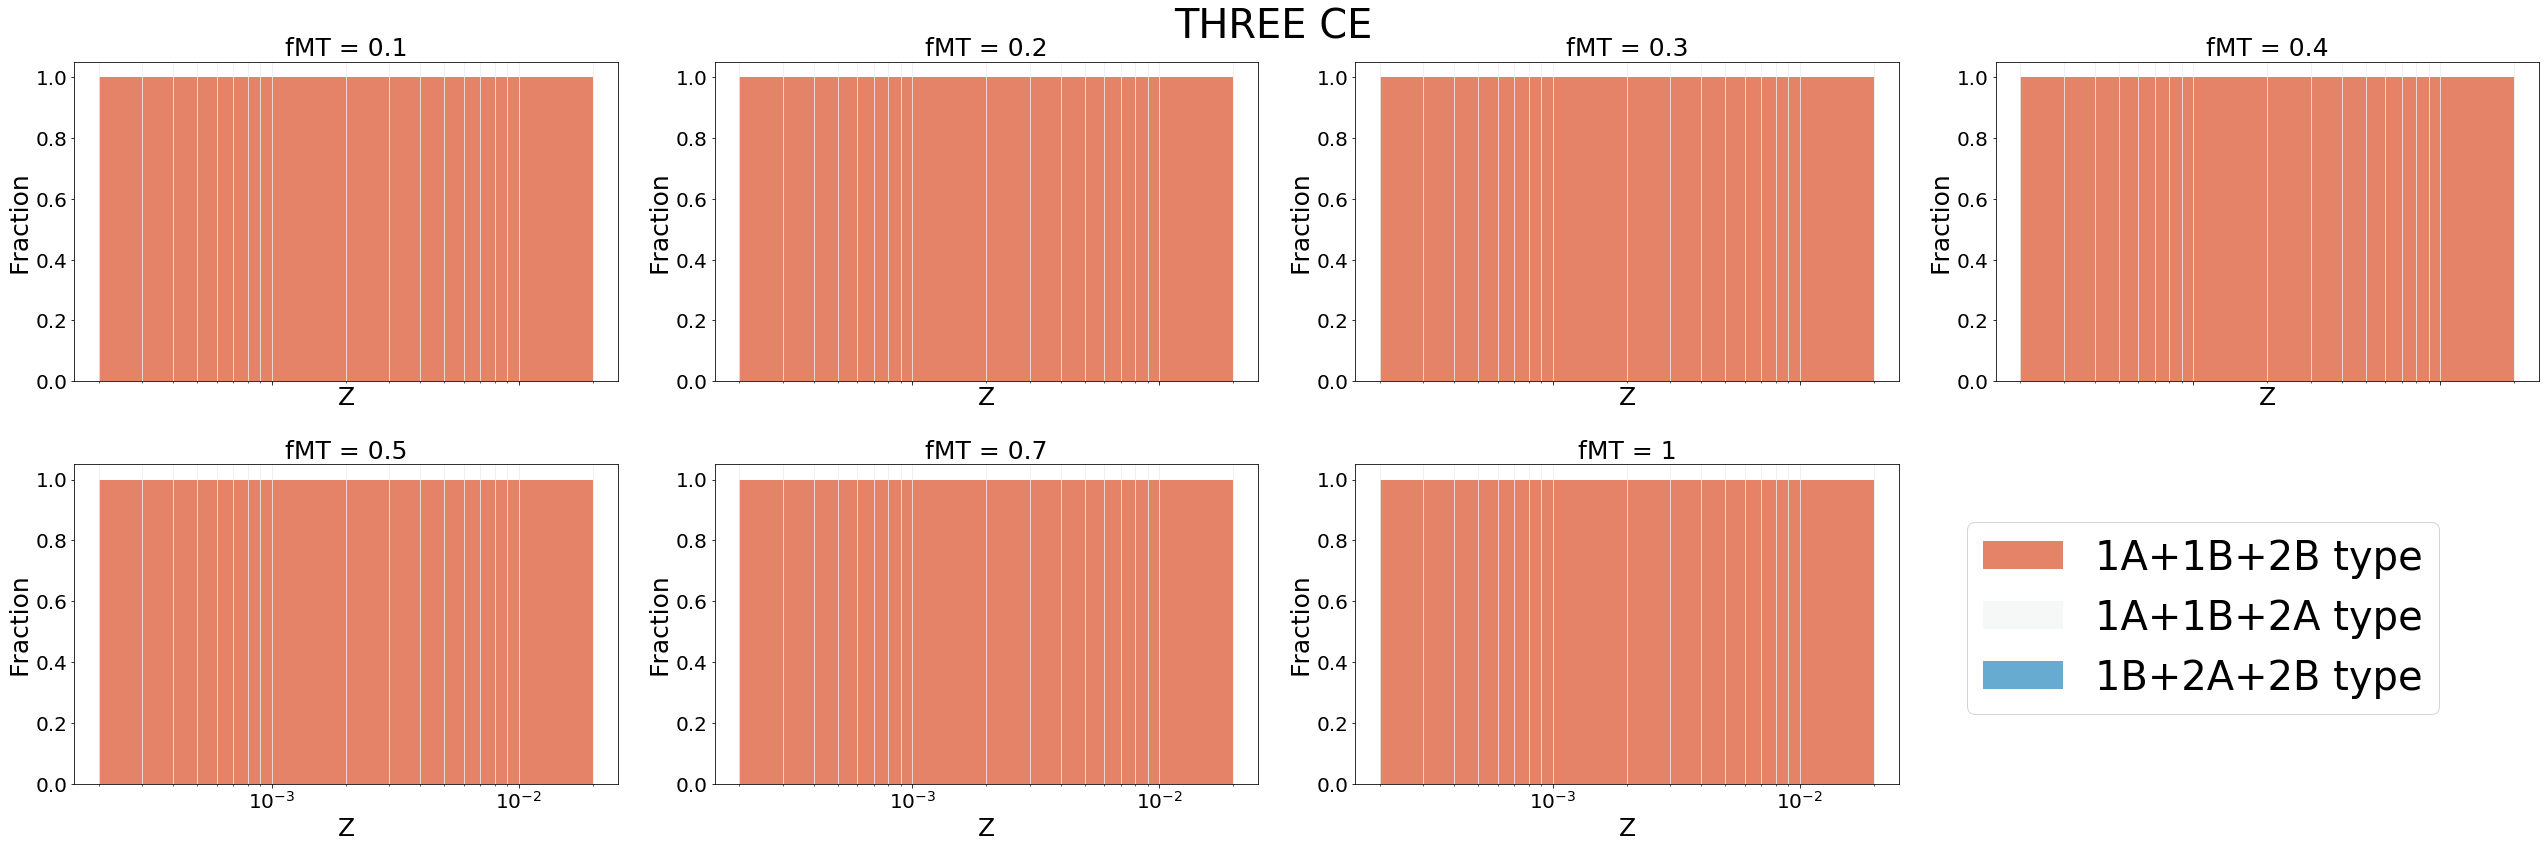

In [28]:
sns.set_palette('RdBu', 3)


fig, ax = plt.subplots(2,4, figsize = (36,12), sharex = True)



for sim_num, i in zip(fmt_to_csv, range(len(fmt_to_csv))):
    
    datas_subsub = datas[datas['fMT'] == sim_num]
    ax[i//4, i%4].stackplot(datas_subsub['Z'].astype(float), 
                            datas_subsub['first_second_fifth_three'].astype(float)/total_three[i*12:(i+1)*12],
                            datas_subsub['first_second_fourth_three'].astype(float)/total_three[i*12:(i+1)*12],
                            datas_subsub['second_fourth_fifth_three'].astype(float)/total_three[i*12:(i+1)*12]) 
    
    ax[i//4, i%4].set_title("fMT = "+str(sim_num), fontsize = '25')
#     ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].set_xscale('log')
    ax[i//4, i%4].set_ylabel('Fraction', fontsize = '25', labelpad = 4)
    ax[i//4, i%4].set_xlabel('Z', fontsize = '25')
    ax[i//4, i%4].tick_params( labelsize = 20 )
    ax[i//4, i%4].grid(True, which="both", axis = 'x' ,ls="-",color='0.93')
    ax[i//4, i%4].yaxis.set_tick_params(labelsize= 20)

    
ax[1, 3].axis('off')

plt.tight_layout(pad = 3)
plt.suptitle('THREE CE', fontsize = '40', y = 1.00)
fig.legend(bbox_to_anchor = (0.85 , 0.4), loc="upper center",labels = ["1A+1B+2B type", "1A+1B+2A type"  ,"1B+2A+2B type"], fontsize = '40', ncol = 1)
plt.savefig('THREE_CE_which.png')
plt.show()